In [ ]:
# IMPORTS
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from sklearn.decomposition import PCA
import pandas as pd
import os
from typing import List, Dict, Tuple

# Linear network with null-space in weight matrices


In [ ]:
class Net(nn.Module):
    '''
    Small width. Depth is adjustable.
    '''
    def __init__(self, width=20, depth=1, d=2):
        super(Net, self).__init__()

        self.depth = depth
        self.w = nn.Linear(d, width, bias=False)
        self.w.weight.data.normal_(0, d ** -0.5)

        # middle layers (if depth > 2)
        self.hidden = nn.ModuleList()
        for _ in range(depth - 2):
            layer = nn.Linear(width, width, bias=False)
            layer.weight.data.normal_(0, width ** -0.5)
            self.hidden.append(layer)

        self.u = nn.Linear(width, d, bias=False)
        self.u.weight.data.normal_(0, width ** -0.5)

    def forward(self, x):
        x = self.w(x)
        for layer in self.hidden:
            x = layer(x)
        x = self.u(x)
        return x

# Library of optimization functions
Collection of functions for optimizing the neural network.

In [ ]:
def gradient_descent(model, X, y, lr=0.05, n_steps=50):
    """
    Classic gradient descent (full batch).
    """
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)
    loss_fn = nn.MSELoss()

    trajectory = []
    losses = []

    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    for _ in range(n_steps):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())

    return (np.array(trajectory), model, np.array(losses))


def sgd(model, X, y, lr=0.05, n_steps=50, batch_size=32):
    """
    Stochastic gradient descent with mini-batches.
    """
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)
    loss_fn = nn.MSELoss()

    trajectory = []
    losses = []

    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    n_samples = X.shape[0]

    for _ in range(n_steps):
        # Random mini-batch
        indices = torch.randperm(n_samples)[:batch_size]
        X_batch = X[indices]
        y_batch = y[indices]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())  # Full dataset loss

    return (np.array(trajectory), model, np.array(losses))


def gradient_descent_momentum(model, X, y, lr=0.05, momentum=0.9, n_steps=50):
    """
    Gradient descent with momentum.
    """
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    loss_fn = nn.MSELoss()

    trajectory = []
    losses = []

    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    for _ in range(n_steps):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())

    return (np.array(trajectory), model, np.array(losses))


def gradient_descent_adam(model, X, y, lr=0.05, n_steps=50):
    """
    Gradient descent with Adam optimizer.
    """
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    trajectory = []
    losses = []

    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    for _ in range(n_steps):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())

    return (np.array(trajectory), model, np.array(losses))


def sgd_weight_decay(model, X, y, lr=0.05, n_steps=50, weight_decay=0.01):
    """
    Gradient descent with weight decay (L2 regularization).
    """
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    trajectory = []
    losses = []

    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    for _ in range(n_steps):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())

    return (np.array(trajectory), model, np.array(losses))
def muon_optimizer(model, X, y, lr=0.05, n_steps=50, muon_param=0.1):
    """
    Placeholder MUON optimizer (full-batch).
    Tracks parameter trajectory and loss at each step.
    """
    loss_fn = nn.MSELoss()
    trajectory = []
    losses = []

    # Initialize trajectory with current parameters
    with torch.no_grad():
        flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
        trajectory.append(flat_params.cpu().numpy())
        losses.append(loss_fn(model(X), y).item())

    # Placeholder MUON internal state (e.g., could be momentum-like)
    muon_state = [torch.zeros_like(p) for p in model.parameters()]

    for _ in range(n_steps):
        # Compute gradients
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        model.zero_grad()
        loss.backward()

        # MUON update: this is a placeholder
        # Replace with the actual MUON rule if available
        with torch.no_grad():
            for p, state in zip(model.parameters(), muon_state):
                # simple MUON-like step (gradient + scaled previous state)
                state[:] = muon_param * state + p.grad
                p -= lr * state
                p.grad.zero_()

        # Track trajectory and full loss
        with torch.no_grad():
            flat_params = torch.cat([p.flatten() for p in model.parameters()]).clone()
            trajectory.append(flat_params.cpu().numpy())
            losses.append(loss_fn(model(X), y).item())

    return np.array(trajectory), model, np.array(losses)



# Plotting functions (PCA)

In [ ]:
def plot_loss_surface_2d_pca(model, X, y, title, alpha_range=(-3, 3), beta_range=(-3, 3), trajectory=None, reference_params=None, ax=None, shared_directions=None):
    """
    2D loss surface plot using shared PCA directions or trajectory-specific PCA.

    Args:
        model: the trained Net model (nn.Module)
        X, y: input and target tensors
        alpha_range, beta_range: tuples specifying min/max for 2D grid
        trajectory: optional, flattened parameters trajectory (steps x num_params)
        reference_params: optional, center point for the loss surface
        ax: optional matplotlib axis to plot on (for subplots)
        shared_directions: optional, pre-computed PCA directions (v1, v2) to use for all plots
    """
    if reference_params is None:
        theta_0 = torch.cat([p.detach().flatten() for p in model.parameters()]).numpy()
    else:
        theta_0 = reference_params

    n_params = len(theta_0)

    # Use shared directions if provided, otherwise compute from trajectory
    if shared_directions is not None:
        v1, v2 = shared_directions
    elif trajectory is not None and len(trajectory) > 2:
        pca = PCA(n_components=2)
        pca.fit(trajectory - theta_0)
        v1, v2 = pca.components_
    else:
        # Fallback to random
        np.random.seed(0)
        v1 = np.random.randn(n_params)
        v2 = np.random.randn(n_params)
        v1 /= np.linalg.norm(v1)
        v2 /= np.linalg.norm(v2)

    alpha_vals = np.linspace(*alpha_range, 100)
    beta_vals = np.linspace(*beta_range, 100)
    Alpha, Beta = np.meshgrid(alpha_vals, beta_vals)
    Loss = np.zeros_like(Alpha)

    # Create a FRESH model just for evaluating the loss surface
    temp_model = Net(width=model.w.out_features, depth=model.depth, d=model.w.in_features)

    for i in range(Alpha.shape[0]):
        for j in range(Alpha.shape[1]):
            theta_temp = theta_0 + Alpha[i, j]*v1 + Beta[i, j]*v2
            idx = 0
            for p in temp_model.parameters():
                n = p.numel()
                p.data = torch.from_numpy(theta_temp[idx:idx+n]).view_as(p).float()
                idx += n
            with torch.no_grad():
                y_pred = temp_model(X)
                Loss[i, j] = ((y_pred - y)**2).mean().item()

    # Create figure if ax not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
        show_plot = True
    else:
        show_plot = False

    contour = ax.contourf(Alpha, Beta, np.log(Loss + 1e-8), levels=50, cmap="viridis")
    plt.colorbar(contour, ax=ax, label="log(loss)")

    if trajectory is not None:
        traj_proj = []
        for t in trajectory:
            t = t - theta_0
            a = np.dot(t, v1)
            b = np.dot(t, v2)
            traj_proj.append([a, b])
        traj_proj = np.array(traj_proj)

        # Plot trajectory with color gradient from red to green
        n_points = len(traj_proj)
        for i in range(n_points - 1):
            # Interpolate color from red (1, 0, 0) to green (0, 1, 0)
            color_ratio = i / (n_points - 1)
            color = (1 - color_ratio, color_ratio, 0)  # (R, G, B)
            ax.plot(traj_proj[i:i+2, 0], traj_proj[i:i+2, 1],
                   'o-', color=color, markersize=3, linewidth=1)

    ax.set_title(title)
    ax.set_xlabel("alpha (PC1 dir)")
    ax.set_ylabel("beta (PC2 dir)")

    if show_plot:
        plt.show()

In [ ]:
def plot_loss_surface_3d_pca(model, X, y, title, trajectory, alpha_range=(-3, 3), beta_range=(-3, 3), reference_params=None, ax=None, shared_directions=None):
    """
    3D loss surface using shared PCA directions or trajectory-specific PCA.

    Args:
        model: trained Net (only used for architecture info)
        X, y: input/target tensors
        trajectory: flattened parameter trajectory (steps x num_params)
        alpha_range, beta_range: ranges for 2D slice
        title: plot title
        reference_params: optional center point for loss surface
        ax: optional matplotlib 3D axis to plot on (for subplots)
        shared_directions: optional, pre-computed PCA directions (v1, v2) to use for all plots
    """
    # Use shared reference point
    if reference_params is None:
        theta_0 = torch.cat([p.detach().flatten() for p in model.parameters()]).numpy()
    else:
        theta_0 = reference_params

    # Use shared directions if provided, otherwise compute from trajectory
    if shared_directions is not None:
        v1, v2 = shared_directions
    elif trajectory is not None and len(trajectory) > 2:
        pca = PCA(n_components=2)
        pca.fit(trajectory - theta_0)
        v1, v2 = pca.components_
    else:
        # Fallback to random
        np.random.seed(0)
        v1 = np.random.randn(len(theta_0))
        v2 = np.random.randn(len(theta_0))
        v1 /= np.linalg.norm(v1)
        v2 /= np.linalg.norm(v2)

    # Create 2D grid
    alpha_vals = np.linspace(*alpha_range, 50)
    beta_vals = np.linspace(*beta_range, 50)
    Alpha, Beta = np.meshgrid(alpha_vals, beta_vals)
    Loss = np.zeros_like(Alpha)

    # Create a FRESH model for computing loss surface
    temp_model = Net(width=model.w.out_features, depth=model.depth, d=model.w.in_features)

    # Compute loss on the grid
    for i in range(Alpha.shape[0]):
        for j in range(Alpha.shape[1]):
            theta_temp = theta_0 + Alpha[i,j]*v1 + Beta[i,j]*v2

            # Load parameters into temp model
            idx = 0
            for p in temp_model.parameters():
                n = p.numel()
                p.data = torch.from_numpy(theta_temp[idx:idx+n]).view_as(p).float()
                idx += n

            with torch.no_grad():
                y_pred = temp_model(X)
                Loss[i,j] = ((y_pred - y)**2).mean().item()

    # Create figure if ax not provided
    if ax is None:
        fig = plt.figure(figsize=(9, 7))
        ax = fig.add_subplot(111, projection='3d')
        show_plot = True
    else:
        show_plot = False
        fig = ax.figure

    # Plot surface
    surf = ax.plot_surface(Alpha, Beta, Loss, cmap='viridis', alpha=0.8)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Loss")

    # Project trajectory onto the PCA plane
    traj_proj = []
    traj_loss = []
    for t in trajectory:
        t_rel = t - theta_0
        a = np.dot(t_rel, v1)
        b = np.dot(t_rel, v2)
        traj_proj.append([a, b])

        # Loss at this trajectory point
        theta_temp = theta_0 + a*v1 + b*v2
        idx = 0
        for p in temp_model.parameters():
            n = p.numel()
            p.data = torch.from_numpy(theta_temp[idx:idx+n]).view_as(p).float()
            idx += n

        with torch.no_grad():
            y_pred = temp_model(X)
            traj_loss.append(((y_pred - y)**2).mean().item())

    traj_proj = np.array(traj_proj)
    traj_loss = np.array(traj_loss)

    # Plot trajectory with color gradient from red to green
    n_points = len(traj_proj)
    for i in range(n_points - 1):
        # Interpolate color from red (1, 0, 0) to green (0, 1, 0)
        color_ratio = i / (n_points - 1)
        color = (1 - color_ratio, color_ratio, 0)  # (R, G, B)
        ax.plot(traj_proj[i:i+2, 0], traj_proj[i:i+2, 1], traj_loss[i:i+2],
               'o-', color=color, markersize=3, linewidth=1)

    ax.set_xlabel("alpha (PC1 dir)")
    ax.set_ylabel("beta (PC2 dir)")
    ax.set_zlabel("Loss")
    ax.set_title(title)

    if show_plot:
        plt.show()

In [ ]:
def plot_loss_surface_3d_minima(
    model, X, y, trajectory, title,
    reference_params, shared_directions,
    alpha_range, beta_range, ax,
    minima_lines=None            # <<< NEW
):
    """
    3D loss surface with trajectory, initialization, minimum,
    and now: theoretical minima lines.
    """

    # -------------------------------------------------------------
    # Extract parameter reference + PCA directions
    # -------------------------------------------------------------
    theta0 = reference_params.copy()
    v1, v2 = shared_directions

    # helper: rebuild fresh model
    def make_temp_model():
        return model.__class__(
            width=model.w.out_features,
            depth=model.depth,
            d=model.w.in_features
        )

    temp_model = make_temp_model()

    # -------------------------------------------------------------
    # Create grid
    # -------------------------------------------------------------
    A = np.linspace(*alpha_range, 80)
    B = np.linspace(*beta_range, 80)
    Alpha, Beta = np.meshgrid(A, B)
    Loss = np.zeros_like(Alpha)

    # -------------------------------------------------------------
    # Evaluate grid losses
    # -------------------------------------------------------------
    for i in range(Alpha.shape[0]):
        for j in range(Alpha.shape[1]):
            theta = theta0 + Alpha[i,j]*v1 + Beta[i,j]*v2

            idx = 0
            for p in temp_model.parameters():
                n = p.numel()
                p.data = torch.from_numpy(theta[idx:idx+n]).view_as(p).float()
                idx += n

            with torch.no_grad():
                Loss[i,j] = ((temp_model(X) - y)**2).mean().item()

    # -------------------------------------------------------------
    # Plot main surface
    # -------------------------------------------------------------
    ax.plot_surface(
        Alpha, Beta, Loss,
        cmap='viridis', alpha=0.8, linewidth=0
    )

    # -------------------------------------------------------------
    # Trajectory projection + loss
    # -------------------------------------------------------------
    traj_proj = (trajectory - theta0) @ np.vstack([v1, v2]).T
    traj_loss = []

    for a, b in traj_proj:
        theta = theta0 + a*v1 + b*v2

        idx = 0
        for p in temp_model.parameters():
            n = p.numel()
            p.data = torch.from_numpy(theta[idx:idx+n]).view_as(p).float()
            idx += n

        with torch.no_grad():
            traj_loss.append(((temp_model(X) - y)**2).mean().item())

    traj_loss = np.array(traj_loss)

    # colored trajectory
    for i in range(len(traj_proj)-1):
        c = i/(len(traj_proj)-1)
        ax.plot(
            traj_proj[i:i+2,0],
            traj_proj[i:i+2,1],
            traj_loss[i:i+2],
            color=(1-c, c, 0), linewidth=1.5
        )

    # -------------------------------------------------------------
    # Mark initialization
    # -------------------------------------------------------------
    ax.scatter(
        traj_proj[0,0], traj_proj[0,1], traj_loss[0],
        color="white", s=40, edgecolors="black", zorder=20
    )

    # -------------------------------------------------------------
    # Mark minimum (reference)
    # -------------------------------------------------------------
    theta_min = reference_params
    a_min = np.dot(theta_min - theta0, v1)
    b_min = np.dot(theta_min - theta0, v2)

    idx = 0
    for p in temp_model.parameters():
        n = p.numel()
        p.data = torch.from_numpy(theta_min[idx:idx+n]).view_as(p).float()
        idx += n

    with torch.no_grad():
        z_min = ((temp_model(X) - y)**2).mean().item()

    ax.scatter(a_min, b_min, z_min, color="blue", s=50, zorder=30)

    # -------------------------------------------------------------
    # === NEW: draw minima lines (3D curves on surface) ===
    # -------------------------------------------------------------
    if minima_lines is not None:
        for (m0, direction) in minima_lines:

            # project the line (m0 + t * direction) into PCA space
            t_vals = np.linspace(-5, 5, 150)

            A_line = []
            B_line = []
            Z_line = []

            for t in t_vals:
                theta_line = m0 + t * direction
                delta = theta_line - theta0

                a = np.dot(delta, v1)
                b = np.dot(delta, v2)

                A_line.append(a)
                B_line.append(b)

                # compute the loss
                idx = 0
                for p in temp_model.parameters():
                    n = p.numel()
                    p.data = torch.from_numpy(theta_line[idx:idx+n]).view_as(p).float()
                    idx += n

                with torch.no_grad():
                    z_val = ((temp_model(X) - y)**2).mean().item()

                Z_line.append(z_val)

            A_line = np.array(A_line)
            B_line = np.array(B_line)
            Z_line = np.array(Z_line)

            # plot the curve
            ax.plot(
                A_line, B_line, Z_line,
                color="white", linewidth=2.5, alpha=0.9
            )

    # -------------------------------------------------------------
    # labels
    # -------------------------------------------------------------
    ax.set_title(title)
    ax.set_xlabel("α (PC1)")
    ax.set_ylabel("β (PC2)")
    ax.set_zlabel("Loss")


In [ ]:
def plot_loss_surface_2d_minima(
    model, X, y, title,
    alpha_range=(-3, 3), beta_range=(-3, 3),
    trajectory=None, reference_params=None, ax=None,
    shared_directions=None,
    minimum_params=None,
    manifold_params=None,
    minima_lines=None,           # NEW: list of (point, direction)
    line_t_range=(-3, 3),        # NEW
    line_samples=200             # NEW
):
    """
    2D loss surface plot using shared PCA directions.
    Supports:
        - training trajectory
        - single minimum
        - manifold of minima (cloud)
        - theoretical minima lines (from Hessian eigenvectors)
    """

    # -------------------------
    # 1. Reference point
    # -------------------------
    if reference_params is None:
        theta_0 = np.concatenate([p.detach().flatten().numpy()
                                  for p in model.parameters()])
    else:
        theta_0 = reference_params

    n_params = len(theta_0)

    # -------------------------
    # 2. PCA directions
    # -------------------------
    if shared_directions is not None:
        v1, v2 = shared_directions

    elif trajectory is not None and len(trajectory) > 2:
        pca = PCA(n_components=2)
        pca.fit(trajectory - theta_0)
        v1, v2 = pca.components_

    else:
        np.random.seed(0)
        v1 = np.random.randn(n_params)
        v2 = np.random.randn(n_params)
        v1 /= np.linalg.norm(v1)
        v2 /= np.linalg.norm(v2)

    # -------------------------
    # 3. Loss grid
    # -------------------------
    alpha_vals = np.linspace(*alpha_range, 100)
    beta_vals  = np.linspace(*beta_range, 100)
    Alpha, Beta = np.meshgrid(alpha_vals, beta_vals)
    Loss = np.zeros_like(Alpha)

    # Temp model for evaluation
    temp_model = Net(width=model.w.out_features,
                     depth=model.depth,
                     d=model.w.in_features)

    for i in range(Alpha.shape[0]):
        for j in range(Alpha.shape[1]):
            theta_temp = theta_0 + Alpha[i,j]*v1 + Beta[i,j]*v2
            idx = 0
            for p in temp_model.parameters():
                n = p.numel()
                p.data = torch.from_numpy(theta_temp[idx:idx+n]).view_as(p).float()
                idx += n

            with torch.no_grad():
                Loss[i, j] = ((temp_model(X) - y)**2).mean().item()

    # -------------------------
    # 4. Plot surface
    # -------------------------
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,5))

    contour = ax.contourf(Alpha, Beta, np.log(Loss+1e-8), levels=50, cmap="viridis")
    plt.colorbar(contour, ax=ax, label="log(loss)")

    # -------------------------
    # 5. Training trajectory
    # -------------------------
    if trajectory is not None:
        proj = []
        for t in trajectory:
            t = t - theta_0
            proj.append([np.dot(t, v1), np.dot(t, v2)])
        proj = np.array(proj)

        for i in range(len(proj)-1):
            color = (1 - i/(len(proj)-1), i/(len(proj)-1), 0)
            ax.plot(proj[i:i+2,0], proj[i:i+2,1], 'o-', color=color, markersize=3)

    # -------------------------
    # 6. Single minimum
    # -------------------------
    if minimum_params is not None:
        t = minimum_params - theta_0
        a = np.dot(t, v1)
        b = np.dot(t, v2)
        ax.plot(a, b, 'r*', markersize=18, label="Minimum")

    # -------------------------
    # 7. Minima manifold (scatter)
    # -------------------------
    if manifold_params is not None:
        proj = []
        for m in manifold_params:
            t = m - theta_0
            proj.append([np.dot(t, v1), np.dot(t, v2)])
        proj = np.array(proj)

        ax.plot(proj[:,0], proj[:,1], 'w.', markersize=6, label="Minima Manifold")

    # -------------------------
    # 8. Theoretical minima lines
    # -------------------------
    if minima_lines is not None:
        t_vals = np.linspace(*line_t_range, line_samples)

        for (p0, direction) in minima_lines:
            p0 = np.array(p0).flatten()
            direction = np.array(direction).flatten()

            line_pts = np.array([p0 + t * direction for t in t_vals])
            proj = []
            for pt in line_pts:
                t = pt - theta_0
                proj.append([np.dot(t, v1), np.dot(t, v2)])
            proj = np.array(proj)

            ax.plot(proj[:,0], proj[:,1], 'w--', linewidth=2, label="Eigen Minima Line")

    ax.set_title(title)
    ax.set_xlabel("alpha (PC1 dir)")
    ax.set_ylabel("beta (PC2 dir)")
    ax.legend(loc="upper right")

    if ax is None:
        plt.show()


# Initialize data

In [ ]:
def make_2d_eigen_data(n=200, eigvals=[1.0, 0.1], noise=0.1, seed=None):
    '''
    The smaller the second eigenvalue is, the closer we approximate to rank-deficient data.
    '''
    if seed is not None:
        np.random.seed(seed)

    d = len(eigvals)
    # Random orthogonal matrix for eigenvectors
    Q, _ = np.linalg.qr(np.random.randn(d, d))
    Sigma = Q @ np.diag(eigvals) @ Q.T
    X = np.random.multivariate_normal(mean=np.zeros(d), cov=Sigma, size=n)

    # Ground-truth maapping (simple, fixed)
    true_w = np.array([[1.0], [1.0]])
    y = X @ true_w + noise * np.random.randn(n, 1)
    return X, y, true_w

In [ ]:
def make_nd_eigen_data(n=200, eigvals=None, noise=0.1, seed=None, true_w=None):

    if eigvals is None:
        raise ValueError("You must supply eigvals (their length determines dimension).")

    if seed is not None:
        np.random.seed(seed)

    d = len(eigvals)

    # Random orthogonal matrix for eigenvectors
    Q, _ = np.linalg.qr(np.random.randn(d, d))

    # Covariance with prescribed spectrum
    Sigma = Q @ np.diag(eigvals) @ Q.T

    # Sample data
    X = np.random.multivariate_normal(mean=np.zeros(d), cov=Sigma, size=n)

    # Ground-truth mapping (default: all ones)
    if true_w is None:
        true_w = np.ones((d, 1))

    y = X @ true_w + noise * np.random.randn(n, 1)

    return X, y, true_w


# Experiment
For each optimizer, on synthetic data.

In [ ]:
def run_optimizer_comparison(eigvals, description, n_samples=1000, width=20, depth=3, n_steps=200, seed=1):
    """
    Run all optimizers on data with specified eigenvalues.

    Returns:
        dict with 'optimizer_info', 'X', 'y' keys
    """
    print(f"\n{'='*60}")
    print(f"Testing: {description}")
    print(f"{'='*60}")

    # Generate data
    X_np, y_np, w_true = make_nd_eigen_data(
        n=n_samples, eigvals=eigvals, noise=0.1, seed=seed
    )
    X = torch.from_numpy(X_np).float()
    y = torch.from_numpy(y_np).float()

    d_input = len(eigvals)

    reference_model = Net(width=width, depth=depth, d=d_input)
    ref_params = [p.detach().clone() for p in reference_model.parameters()]

    # Step 2: make a function to copy these params into any new model
    def set_model_params(model, ref_params):
        for p, rp in zip(model.parameters(), ref_params):
            p.data.copy_(rp)

    # Step 3: initialize each optimizer model from reference
    model_gd = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_gd, ref_params)
    traj_gd, model_gd, losses_gd = gradient_descent(model_gd, X, y, lr=0.05, n_steps=n_steps)

    model_sgd = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_sgd, ref_params)
    traj_sgd, model_sgd, losses_sgd = sgd(model_sgd, X, y, lr=0.05, n_steps=n_steps)

    model_momentum = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_momentum, ref_params)
    traj_momentum, model_momentum, losses_momentum = gradient_descent_momentum(
        model_momentum, X, y, lr=0.01, momentum=0.9, n_steps=n_steps)

    model_adam = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_adam, ref_params)
    traj_adam, model_adam, losses_adam = gradient_descent_adam(model_adam, X, y, lr=0.01, n_steps=n_steps)

    model_sgdwd = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_sgdwd, ref_params)
    traj_sgdwd, model_sgdwd, losses_sgdwd = sgd_weight_decay(model_sgdwd, X, y, lr=0.01, weight_decay=0.1, n_steps=n_steps)

    model_muon = Net(width=width, depth=depth, d=d_input)
    set_model_params(model_muon, ref_params)
    traj_muon, model_muon, losses_muon = muon_optimizer(model_muon, X, y, lr=0.01, muon_param=0.1, n_steps=n_steps)

    optimizer_info = {
          "GD": (traj_gd, model_gd, losses_gd),
          "SGD": (traj_sgd, model_sgd, losses_sgd),
          "Momentum": (traj_momentum, model_momentum, losses_momentum),
          "Adam": (traj_adam, model_adam, losses_adam),
          "WD": (traj_sgdwd, model_sgdwd, losses_sgdwd),
            "Muon": (traj_muon, model_muon, losses_muon)
        }

    # Print final losses
    print("\nFinal Losses:")
    for name, (_, _, losses) in optimizer_info.items():
        print(f"  {name}: {losses[-1]:.6f}")

    # Reference point for plotting this experiment
    reference_model = Net(width=width, depth=depth, d=d_input)
    reference_params = torch.cat([p.detach().flatten() for p in reference_model.parameters()]).numpy()

    return {
        'optimizer_info': optimizer_info,
        'X': X,
        'y': y,
        'width': width,
        'depth': depth,
        'd_input': d_input,
        'reference_params': reference_params,
        'w_true': w_true
    }


In [ ]:
N_SAMPLES = 5000
WIDTH = 20
DEPTH = 3
N_STEPS = 200
MAX_RETRIES = 5

# Define conditions to test
conditions = [
    ([1.0, 0.9], "Well-conditioned (κ=1.1)"),
    ([1.0, 0.1], "Moderate (κ=10)"),
    ([1.0, 0.01], "Ill-conditioned (κ=100)"),
]

In [ ]:
def make_geom_eigs(d, kappa):
    """
    Make d eigenvalues with condition number kappa.
    Largest eigenvalue = 1.0
    Smallest eigenvalue = 1/kappa
    Geometric spacing in between.
    """
    return list(np.geomspace(1.0, 1.0 / kappa, num=d))


dimensions = [2, 3, 5, 10, 50]
kappas = [
    (1.1, "Well-conditioned (κ≈1.1)"),
    (10,  "Moderate (κ≈10)"),
    (100, "Ill-conditioned (κ≈100)")
]

# --- FIXED: group conditions by dimension ---
conditions_by_dim = {}

for d in dimensions:
    dim_list = []
    for kappa, label in kappas:
        eigs = make_geom_eigs(d, kappa)
        dim_list.append((eigs, f"{label}, d={d}"))
    conditions_by_dim[d] = dim_list


In [ ]:
# ===============
# RUN EXPERIMENTS
# ===============

# Retry entire experiment if any condition has NaN
all_results = None
for attempt in range(MAX_RETRIES):
    print(f"\n{'#'*60}")
    print(f"EXPERIMENT ATTEMPT {attempt + 1}/{MAX_RETRIES}")
    print(f"{'#'*60}")

    all_results = {}
    has_nan = False

    for eigvals, description in conditions:
        # Use different seed each attempt
        result = run_optimizer_comparison(
            eigvals, description, N_SAMPLES, WIDTH, DEPTH, N_STEPS,
            seed=1 + attempt
        )

        # Check for NaN
        for name, (traj, _, losses) in result['optimizer_info'].items():
            if np.isnan(traj).any() or np.isnan(losses).any():
                print(f"  WARNING: NaN detected in {description} - {name}")
                has_nan = True
                break

        if has_nan:
            break

        all_results[description] = result

    if not has_nan:
        print("\n✓ All experiments completed successfully!")
        break
    else:
        print("\n✗ NaN value detected. Retrying entire run.")

if has_nan:
    raise RuntimeError(f"Failed after {MAX_RETRIES} attempts")


############################################################
EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ=1.1)


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.010071
  SGD: 0.010583
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.011099
  Muon: 0.010071

Testing: Moderate (κ=10)

Final Losses:
  GD: 0.010071
  SGD: 0.014451
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.018015
  Muon: 0.010215

Testing: Ill-conditioned (κ=100)

Final Losses:
  GD: 0.010106
  SGD: 0.010139
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.014293
  Muon: 0.011205

✓ All experiments completed successfully!


In [ ]:
results_by_dim = {}
for d, conditions in conditions_by_dim.items():

    print("\n" + "="*80)
    print(f"RUNNING EXPERIMENTS FOR DIMENSION d = {d}")
    print("="*80)

    all_results_for_dim = None
    success_for_dim = False

    for attempt in range(MAX_RETRIES):
        print(f"\n{'#'*60}")
        print(f"[d={d}] EXPERIMENT ATTEMPT {attempt + 1}/{MAX_RETRIES}")
        print(f"{'#'*60}")

        all_results = {}
        has_nan = False

        for eigvals, description in conditions:

            result = run_optimizer_comparison(
                eigvals=eigvals,
                description=description,
                n_samples=N_SAMPLES,
                width=WIDTH,
                depth=DEPTH,
                n_steps=N_STEPS,
                seed=1 + attempt
            )

            for name, (traj, _, losses) in result["optimizer_info"].items():
                if np.isnan(traj).any() or np.isnan(losses).any():
                    print(f"  WARNING: NaN in d={d}, {description} → optimizer {name}")
                    has_nan = True
                    break

            if has_nan:
                break

            all_results[description] = result

        if not has_nan:
            print(f"\n✓ Dimension d={d}: all experiments completed successfully!")
            all_results_for_dim = all_results
            success_for_dim = True
            break
        else:
            print(f"\n✗ d={d}: NaN detected — retrying dimension...")

    if not success_for_dim:
        raise RuntimeError(f"Failed for dimension d={d} after {MAX_RETRIES} attempts")

    results_by_dim[d] = all_results_for_dim



RUNNING EXPERIMENTS FOR DIMENSION d = 2

############################################################
[d=2] EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010071
  SGD: 0.011187
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.011247
  Muon: 0.010071

Testing: Moderate (κ≈10), d=2

Final Losses:
  GD: 0.010071
  SGD: 0.010792
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.017263
  Muon: 0.010107

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: 0.010395
  SGD: 0.010462
  Momentum: 0.010076
  Adam: 0.010071
  WD: 0.021468
  Muon: 0.017303

✓ Dimension d=2: all experiments completed successfully!

RUNNING EXPERIMENTS FOR DIMENSION d = 3

############################################################
[d=3] EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ≈1.1), d=3


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009972
  SGD: 0.010099
  Momentum: 0.009972
  Adam: 0.009972
  WD: 0.013108
  Muon: 0.009972

Testing: Moderate (κ≈10), d=3

Final Losses:
  GD: 0.009972
  SGD: 0.009983
  Momentum: 0.009972
  Adam: 0.009972
  WD: 0.014706
  Muon: 0.010079

Testing: Ill-conditioned (κ≈100), d=3

Final Losses:
  GD: 0.011444
  SGD: 0.012006
  Momentum: 0.010224
  Adam: 0.009972
  WD: 0.063330
  Muon: 0.022083

✓ Dimension d=3: all experiments completed successfully!

RUNNING EXPERIMENTS FOR DIMENSION d = 5

############################################################
[d=5] EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ≈1.1), d=5


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009808
  SGD: 0.010203
  Momentum: 0.009808
  Adam: 0.009808
  WD: 0.013835
  Muon: 0.009840

Testing: Moderate (κ≈10), d=5

Final Losses:
  GD: 0.009988
  SGD: 0.010082
  Momentum: 0.009819
  Adam: 0.009808
  WD: 0.199848
  Muon: 0.074821

Testing: Ill-conditioned (κ≈100), d=5

Final Losses:
  GD: 0.027371
  SGD: 0.028231
  Momentum: 0.011144
  Adam: 0.009808
  WD: 0.129732
  Muon: 0.092917

✓ Dimension d=5: all experiments completed successfully!

RUNNING EXPERIMENTS FOR DIMENSION d = 10

############################################################
[d=10] EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ≈1.1), d=10


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.011528
  SGD: 0.012214
  Momentum: 0.010394
  Adam: 0.010163
  WD: 0.030218
  Muon: 0.034738

Testing: Moderate (κ≈10), d=10

Final Losses:
  GD: 0.014290
  SGD: 0.015203
  Momentum: 0.011287
  Adam: 0.010095
  WD: 0.099133
  Muon: 0.073443

Testing: Ill-conditioned (κ≈100), d=10

Final Losses:
  GD: 0.015866
  SGD: 0.015936
  Momentum: 0.012842
  Adam: 0.010152
  WD: 0.515212
  Muon: 0.233753

✓ Dimension d=10: all experiments completed successfully!

RUNNING EXPERIMENTS FOR DIMENSION d = 50

############################################################
[d=50] EXPERIMENT ATTEMPT 1/5
############################################################

Testing: Well-conditioned (κ≈1.1), d=50


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.052884
  SGD: 0.058655
  Momentum: 0.023532
  Adam: 0.021072
  WD: 0.122267
  Muon: 0.246415

Testing: Moderate (κ≈10), d=50

Final Losses:
  GD: 0.059876
  SGD: 0.061589
  Momentum: 0.031947
  Adam: 0.013783
  WD: 1.685589
  Muon: 0.782863

Testing: Ill-conditioned (κ≈100), d=50

Final Losses:
  GD: 0.085167
  SGD: 0.095572
  Momentum: 0.034155
  Adam: 0.013250
  WD: 2.092807
  Muon: 1.171181

✓ Dimension d=50: all experiments completed successfully!


# Plots


Plotting loss curves for dimension d = 2


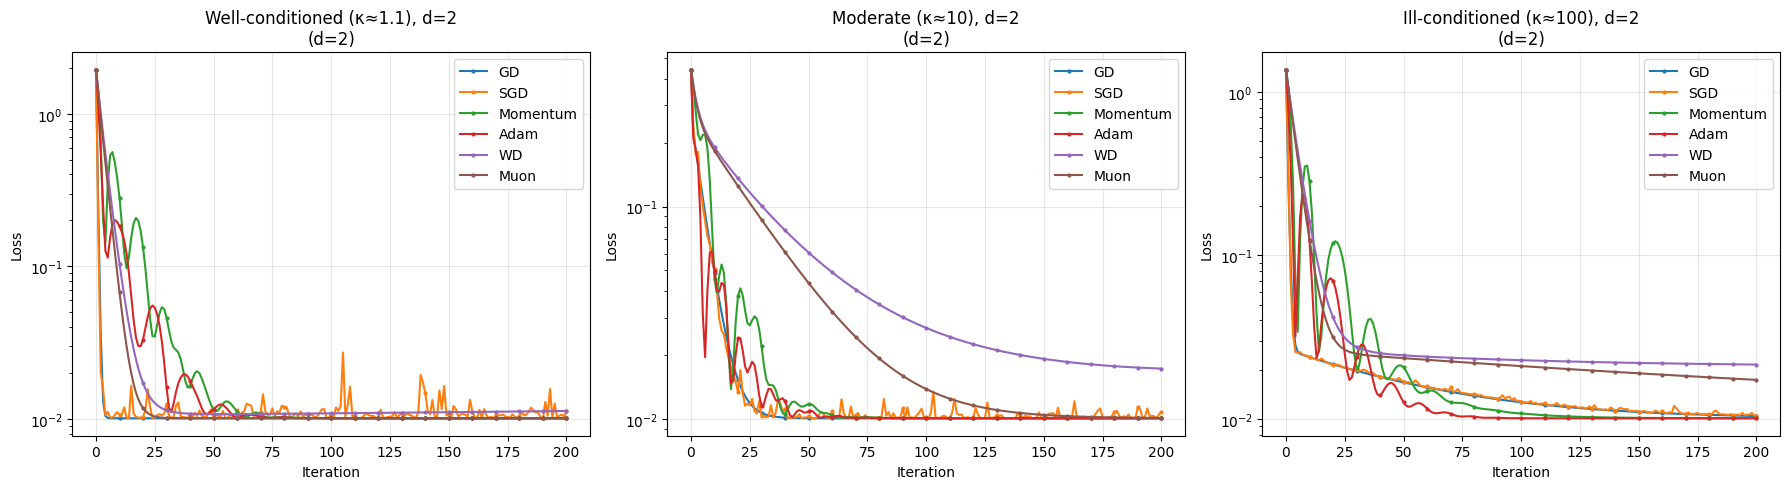


Plotting loss curves for dimension d = 3


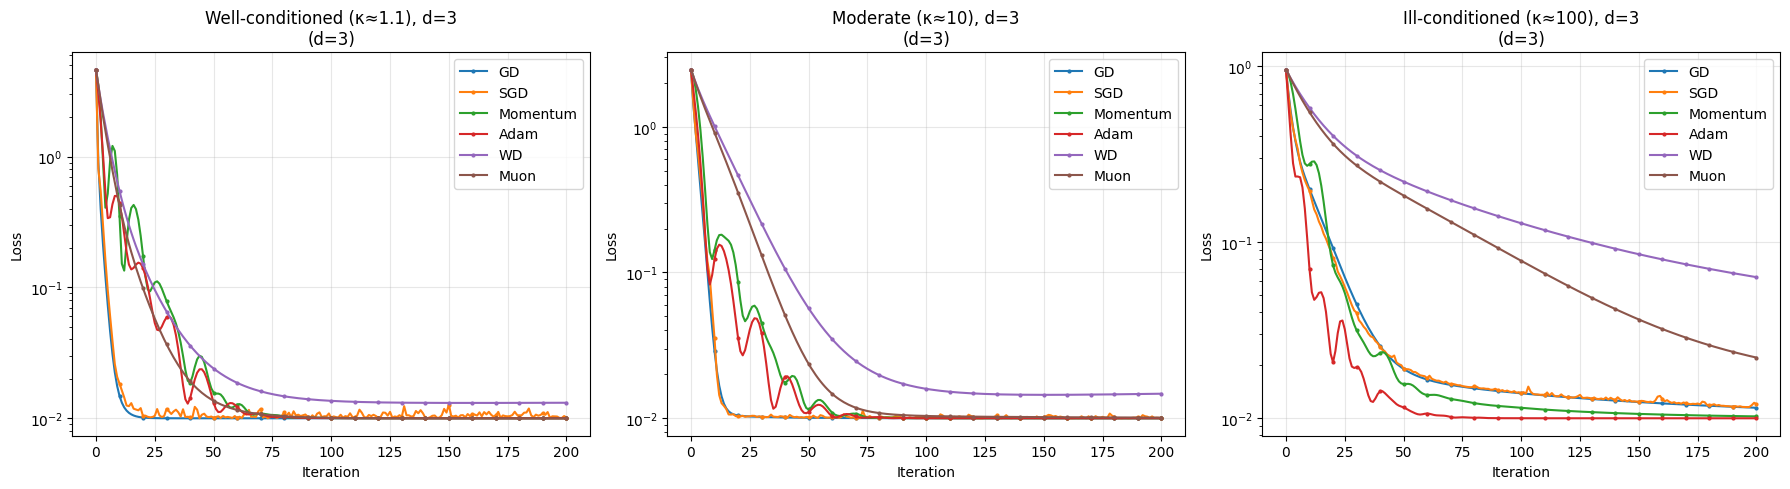


Plotting loss curves for dimension d = 5


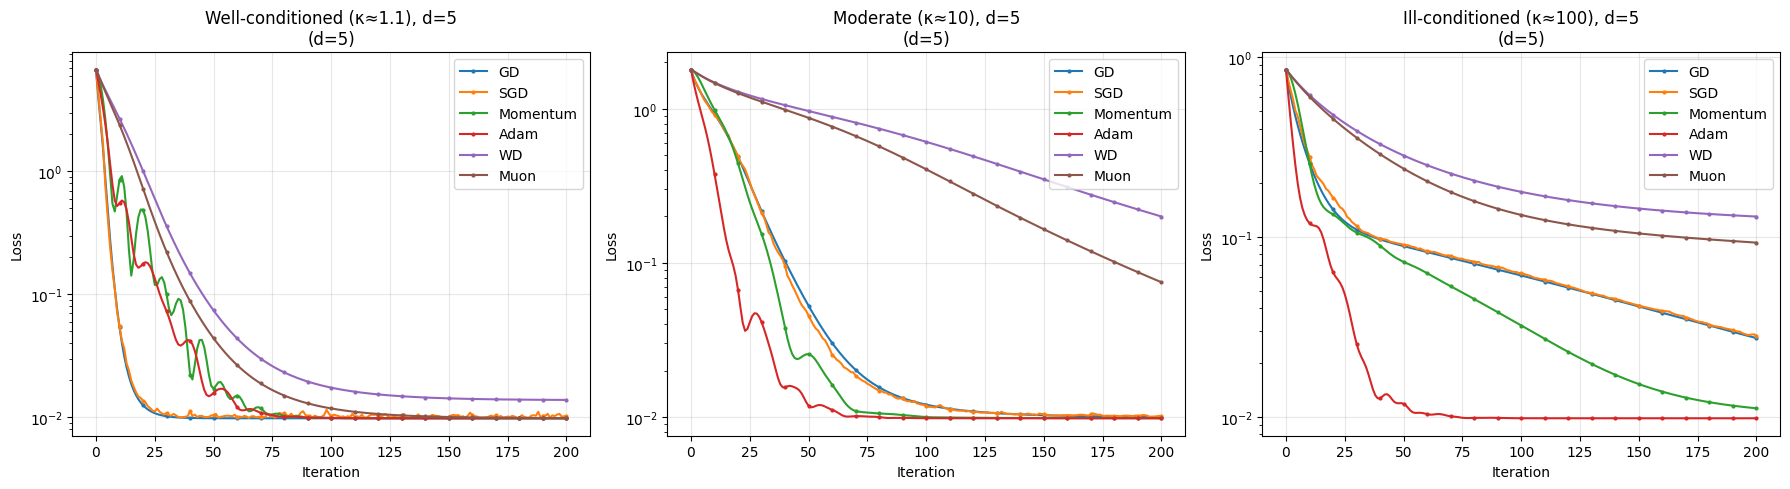


Plotting loss curves for dimension d = 10


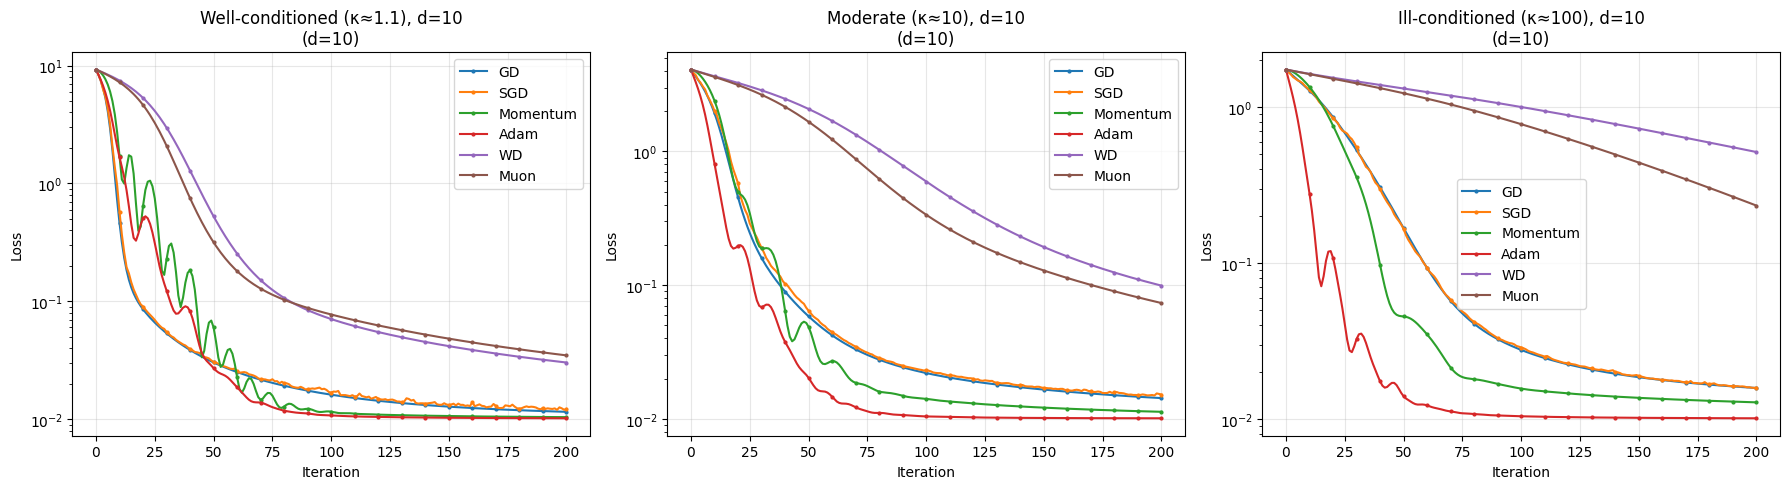


Plotting loss curves for dimension d = 50


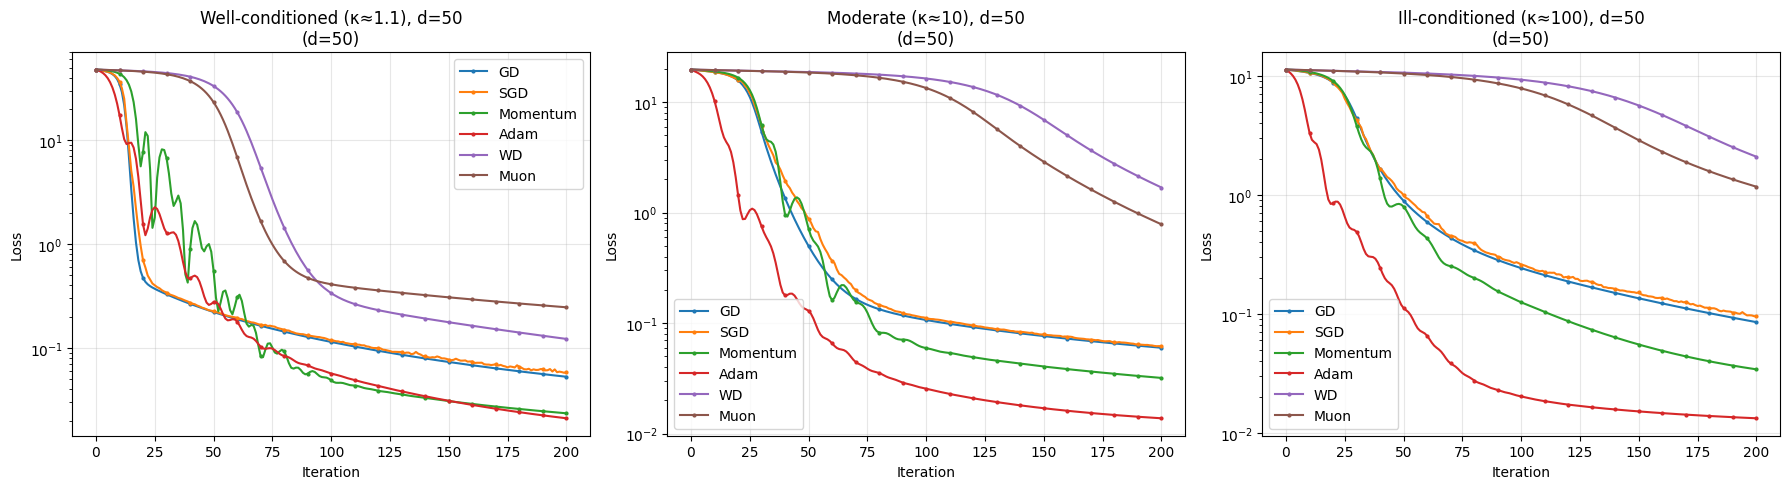

In [ ]:
# ===================================
# PLOT LOSS CONVERGENCE FOR ALL DIMENSIONS
# ===================================

for d, results_for_dim in results_by_dim.items():

    print(f"\nPlotting loss curves for dimension d = {d}")
    fig, axes = plt.subplots(1, len(results_for_dim), figsize=(6 * len(results_for_dim), 5))
    if len(results_for_dim) == 1:
        axes = [axes]
    for ax, (description, results) in zip(axes, results_for_dim.items()):
        optimizer_info = results['optimizer_info']
        for name, (_, _, losses) in optimizer_info.items():
            if not np.isnan(losses).any():
                ax.plot(
                    losses,
                    label=name,
                    marker='o',
                    markersize=2,
                    markevery=max(1, len(losses)//20)
                )
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Loss")
        ax.set_title(f"{description}\n(d={d})")
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)
        ax.legend()

    plt.tight_layout()
    plt.show()


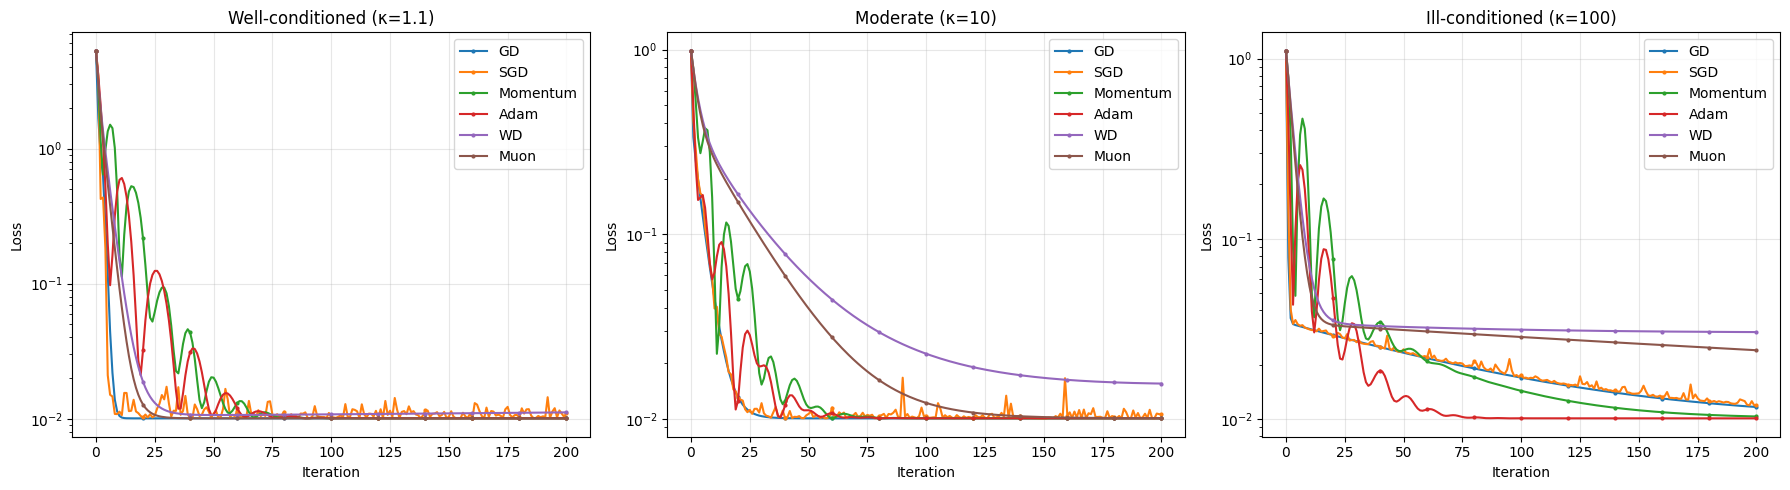

In [ ]:
# ===================================
# 2d: Loss Convergence Comparison
# ===================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (description, results) in enumerate(all_results.items()):
    ax = axes[idx]
    optimizer_info = results['optimizer_info']

    for name, (_, _, losses) in optimizer_info.items():
        if not np.isnan(losses).any():
            ax.plot(losses, label=name, marker='o', markersize=2, markevery=20)

    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    ax.set_title(description)
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

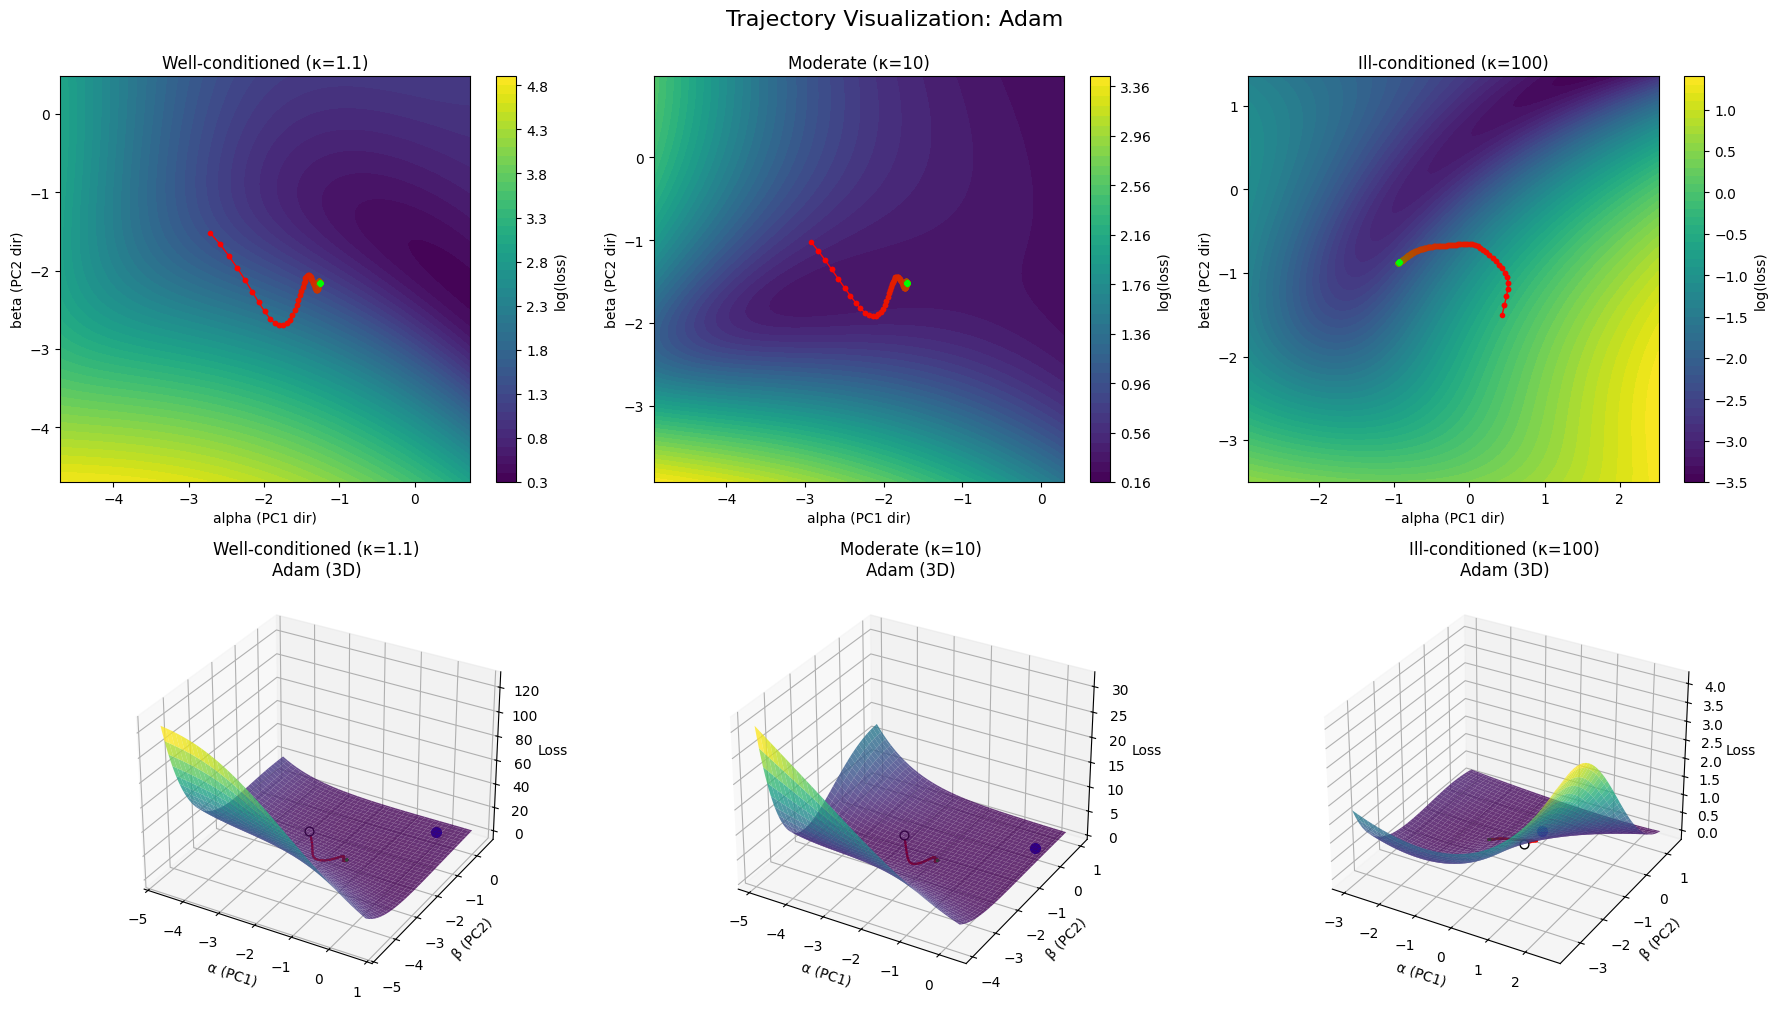

In [ ]:
# PLOT 2: Trajectory Visualization (one optimizer across all conditions)
# ======================================================================
optimizer_to_viz = "Adam"

fig = plt.figure(figsize=(18, 10))

for idx, (description, results) in enumerate(all_results.items()):
    optimizer_info = results['optimizer_info']
    X, y = results['X'], results['y']
    width, depth, d_input = results['width'], results['depth'], results['d_input']
    traj, model, _ = optimizer_info[optimizer_to_viz]

    if np.isnan(traj).any():
        print(f"Skipping {description} - NaN detected")
        continue

    reference_params = results['reference_params']

    pca = PCA(n_components=2)
    pca.fit(traj - reference_params)
    shared_directions = pca.components_

    # Compute plot ranges
    proj = (traj - reference_params) @ shared_directions.T
    traj_alpha_min, traj_alpha_max = proj[:, 0].min(), proj[:, 0].max()
    traj_beta_min, traj_beta_max = proj[:, 1].min(), proj[:, 1].max()

    # Make loss surface range LARGER than trajectory range
    padding = 2.0  # Increase this for more surface shown
    alpha_range = (traj_alpha_min - padding, traj_alpha_max + padding)
    beta_range = (traj_beta_min - padding, traj_beta_max + padding)

    # 2D plot (top row)
    ax_2d = fig.add_subplot(2, 3, idx + 1)
    plot_loss_surface_2d_pca(model, X, y, f"{description}", alpha_range, beta_range,
                             traj, reference_params, ax_2d, shared_directions)

    # 3D plot (bottom row)
    ax_3d = fig.add_subplot(2, 3, idx + 4, projection='3d')
    plot_loss_surface_3d_minima(
                model=model,
                X=X, y=y,
                trajectory=traj,
                title=f"{description}\n{optimizer_to_viz} (3D)",
                reference_params=reference_params,
                shared_directions=shared_directions,
                alpha_range=alpha_range,
                beta_range=beta_range,
                ax=ax_3d
            )
  #plot_loss_surface_3d_pca(model, X, y, f"{description}", traj, alpha_range, beta_range,
   #                          reference_params, ax_3d, shared_directions)

fig.suptitle(f"Trajectory Visualization: {optimizer_to_viz}", fontsize=16, y=0.995)
plt.tight_layout()
plt.show()


==== Plotting κ-condition: Well-conditioned (κ=1.1) ====



/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWa

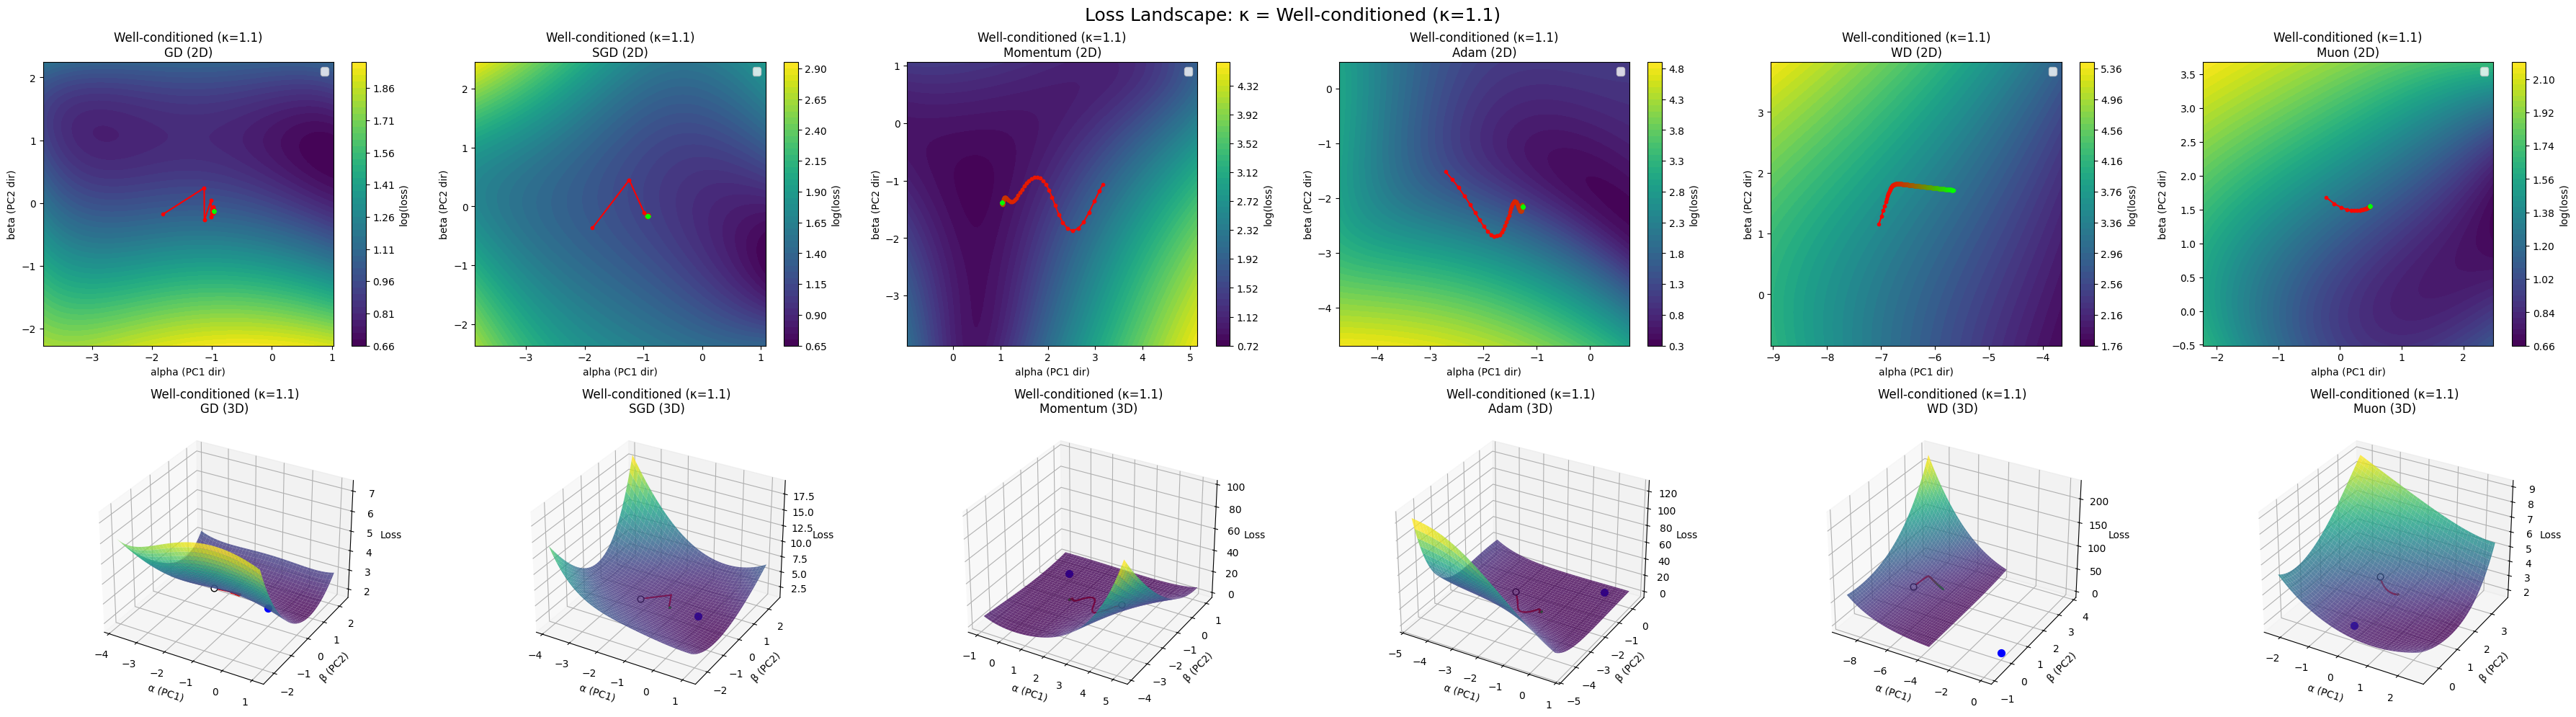


==== Plotting κ-condition: Moderate (κ=10) ====



/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWa

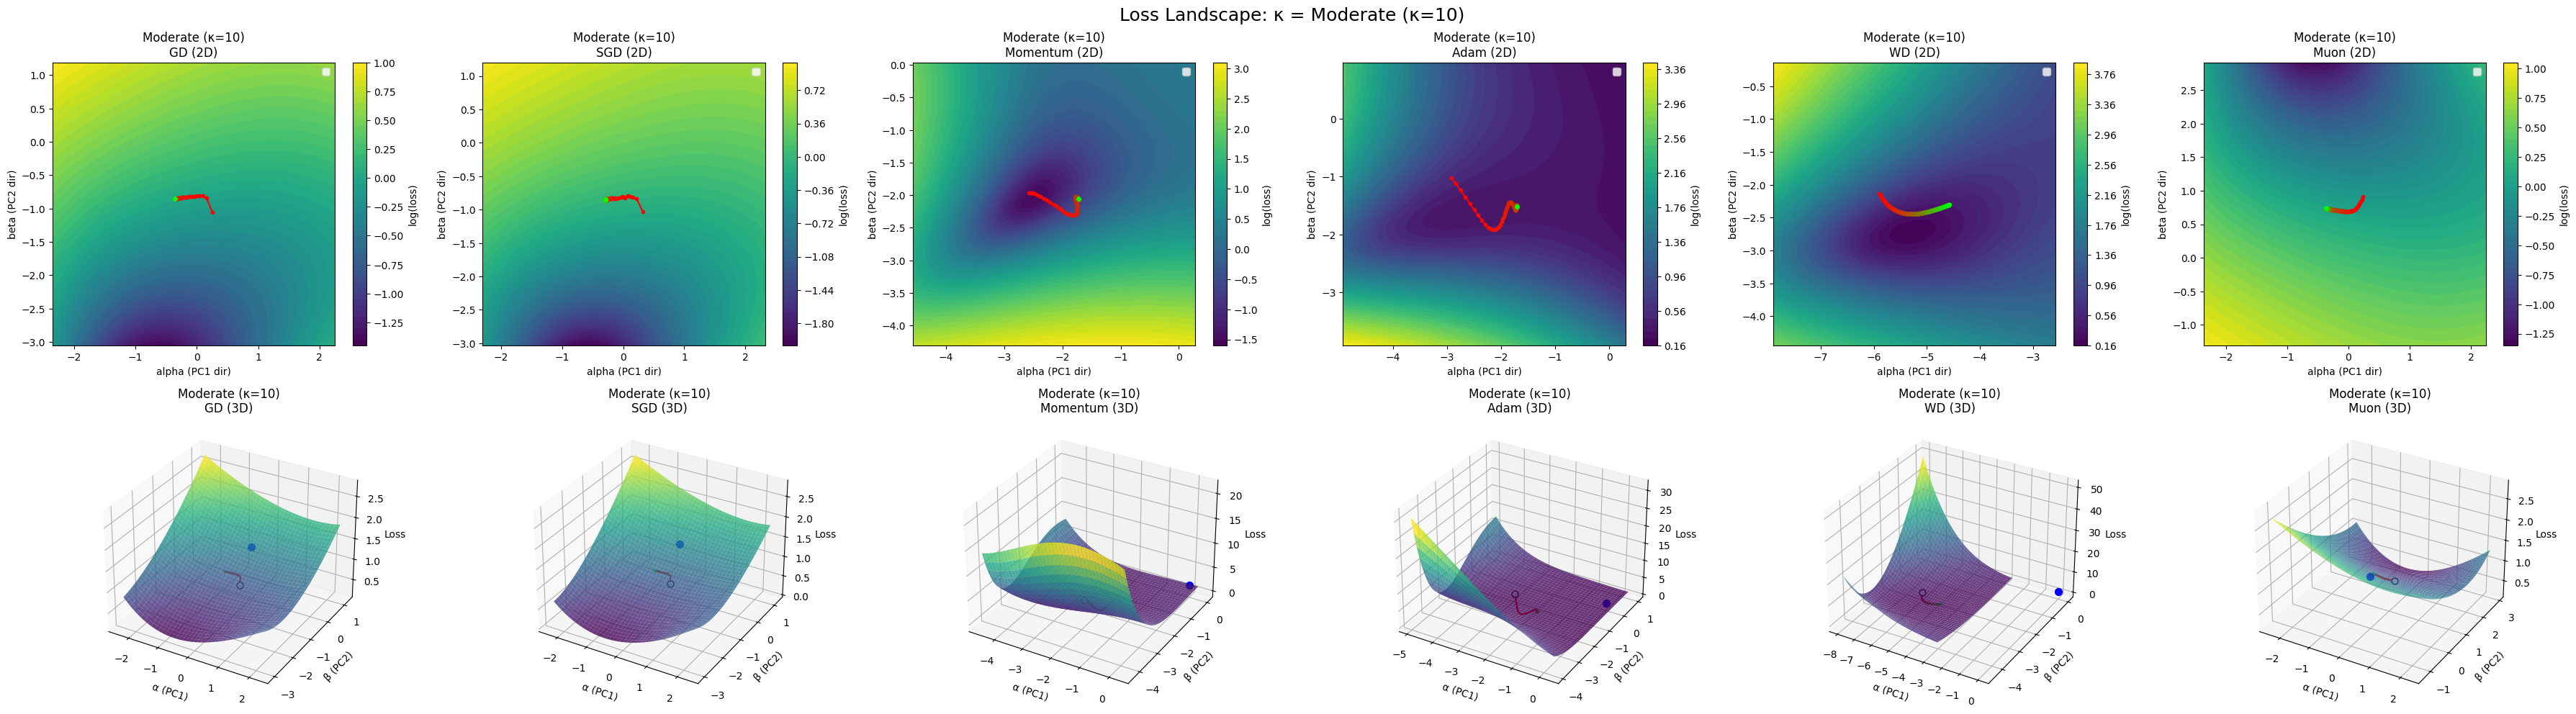


==== Plotting κ-condition: Ill-conditioned (κ=100) ====



/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipython-input-1608901724.py:141: UserWa

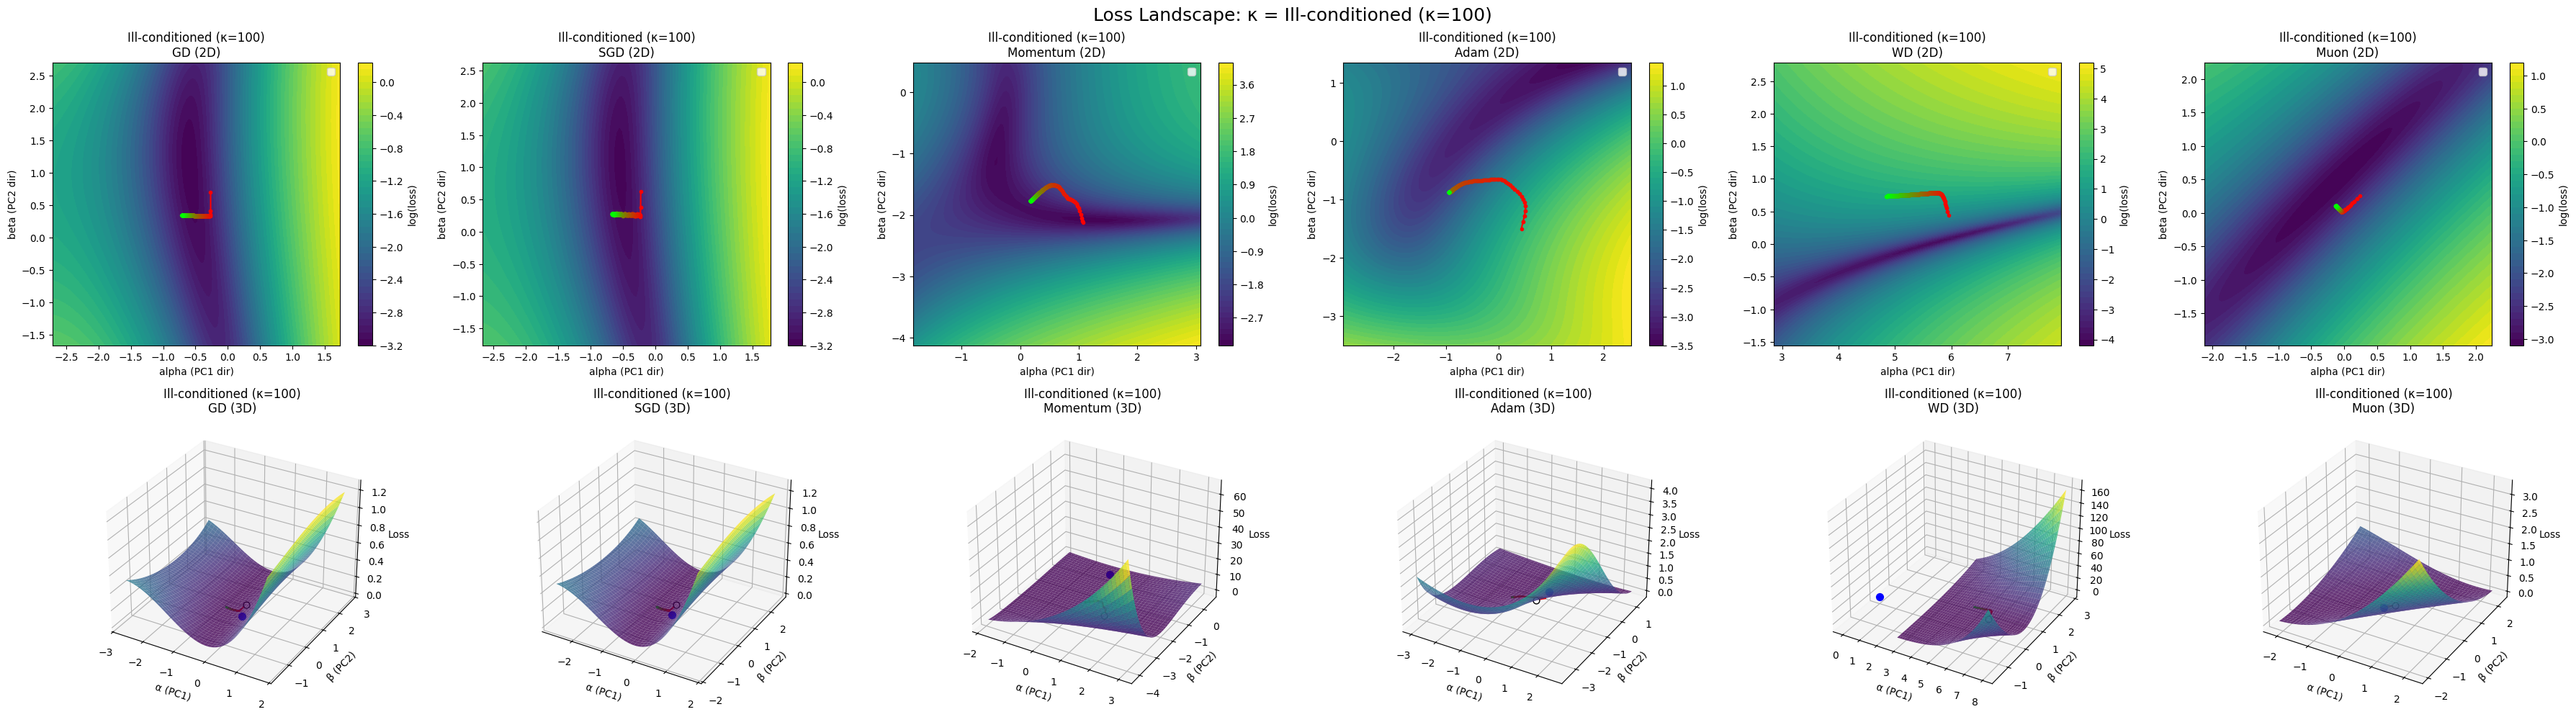

In [ ]:
def plot_all_optimizers_minima(all_results, optimizer_list):
    """
    Plots 2D + 3D loss landscapes with trajectory,
     minima point, and manifold
    for all kappa conditions and all optimizers.

    Uses the new 2D/3D plotting functions that include minima and manifold.
    """

    for description, results in all_results.items():
        print(f"\n==== Plotting κ-condition: {description} ====\n")

        fig = plt.figure(figsize=(6*len(optimizer_list), 10))
        X, y = results['X'], results['y']
        reference_params = results['reference_params']

        for col, opt in enumerate(optimizer_list):
            if opt not in results['optimizer_info']:
                print(f"Optimizer {opt} missing for {description} — skipping.")
                continue

            traj, model, _ = results['optimizer_info'][opt]

            if np.isnan(traj).any():
                print(f"Skipping {description} / {opt}: NaNs in trajectory.")
                continue

            # ---------------------------
            # PCA directions
            # ---------------------------
            pca = PCA(n_components=2)
            pca.fit(traj - reference_params)
            shared_directions = pca.components_

            proj = (traj - reference_params) @ shared_directions.T
            a_min, a_max = proj[:,0].min(), proj[:,0].max()
            b_min, b_max = proj[:,1].min(), proj[:,1].max()
            padding = 2.0
            alpha_range = (a_min - padding, a_max + padding)
            beta_range  = (b_min - padding, b_max + padding)

            # ---------------------------
            # 2D plot with manifold
            # ---------------------------
            ax2d = fig.add_subplot(2, len(optimizer_list), col+1)
            plot_loss_surface_2d_minima(
                model, X, y,
                title=f"{description}\n{opt} (2D)",
                alpha_range=alpha_range,
                beta_range=beta_range,
                trajectory=traj,
                reference_params=reference_params,
                ax=ax2d,
                shared_directions=shared_directions
            )

            # ---------------------------
            # 3D plot with minimum
            # ---------------------------
            ax3d = fig.add_subplot(2, len(optimizer_list), len(optimizer_list)+col+1, projection='3d')
            plot_loss_surface_3d_minima(
                model=model,
                X=X, y=y,
                trajectory=traj,
                title=f"{description}\n{opt} (3D)",
                reference_params=reference_params,
                shared_directions=shared_directions,
                alpha_range=alpha_range,
                beta_range=beta_range,
                ax=ax3d
            )

        fig.suptitle(f"Loss Landscape: κ = {description}", fontsize=18)
        plt.tight_layout()
        plt.show()
optimizer_list = ["GD", "SGD", "Momentum", "Adam", "WD", "Muon"]
plot_all_optimizers_minima(all_results, optimizer_list)


############################################################
RUNNING 30 EXPERIMENTS FOR EACH ND CONDITION
Tracking convergence: loss < 0.03
############################################################

Running 30 experiments for: Well-conditioned (κ≈1.1), d=2

Testing: Well-conditioned (κ≈1.1), d=2


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.010071
  SGD: 0.011316
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.010943
  Muon: 0.010071
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010133
  SGD: 0.010425
  Momentum: 0.010133
  Adam: 0.010133
  WD: 0.011225
  Muon: 0.010133
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.009867
  SGD: 0.009882
  Momentum: 0.009867
  Adam: 0.009867
  WD: 0.010555
  Muon: 0.009867
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010130
  SGD: 0.010792
  Momentum: 0.010130
  Adam: 0.010130
  WD: 0.011277
  Muon: 0.010130
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010057
  SGD: 0.013719
  Momentum: 0.010057
  Adam: 0.010057
  WD: 0.011790
  Muon: 0.010057
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.009913
  SGD: 0.010171
  Momentum: 0.009913
  Adam: 0.009

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009972
  SGD: 0.010351
  Momentum: 0.009972
  Adam: 0.009972
  WD: 0.011854
  Muon: 0.009972
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.010182
  SGD: 0.010542
  Momentum: 0.010183
  Adam: 0.010183
  WD: 0.012778
  Muon: 0.010183
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009893
  SGD: 0.010381
  Momentum: 0.009893
  Adam: 0.009893
  WD: 0.012013
  Muon: 0.009893
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009635
  SGD: 0.009814
  Momentum: 0.009635
  Adam: 0.009635
  WD: 0.012254
  Muon: 0.009635
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.010146
  SGD: 0.011546
  Momentum: 0.010146
  Adam: 0.010146
  WD: 0.012674
  Muon: 0.010146
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009842
  SGD: 0.010586
  Momentum: 0.009842
  Adam: 0.009

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009808
  SGD: 0.009871
  Momentum: 0.009808
  Adam: 0.009808
  WD: 0.014322
  Muon: 0.010303
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010151
  SGD: 0.010343
  Momentum: 0.010151
  Adam: 0.010151
  WD: 0.014249
  Muon: 0.010251
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.009661
  SGD: 0.009910
  Momentum: 0.009661
  Adam: 0.009661
  WD: 0.015606
  Muon: 0.011744
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.009655
  SGD: 0.009937
  Momentum: 0.009655
  Adam: 0.009655
  WD: 0.013859
  Muon: 0.009701
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010040
  SGD: 0.010137
  Momentum: 0.010039
  Adam: 0.010039
  WD: 0.014154
  Muon: 0.011044
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010260
  SGD: 0.010394
  Momentum: 0.010260
  Adam: 0.010

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.012582
  SGD: 0.013183
  Momentum: 0.010761
  Adam: 0.010165
  WD: 0.036079
  Muon: 0.046523
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.013060
  SGD: 0.013610
  Momentum: 0.010706
  Adam: 0.010167
  WD: 0.037545
  Muon: 0.047159
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.012351
  SGD: 0.013187
  Momentum: 0.010477
  Adam: 0.009937
  WD: 0.035886
  Muon: 0.041937
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.011610
  SGD: 0.012042
  Momentum: 0.010102
  Adam: 0.009811
  WD: 0.035115
  Muon: 0.039464
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.012265
  SGD: 0.013134
  Momentum: 0.010786
  Adam: 0.010398
  WD: 0.034496
  Muon: 0.040451
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.011457
  SGD: 0.012160
  Momentum: 0.010252
  Adam: 

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.051209
  SGD: 0.057711
  Momentum: 0.022507
  Adam: 0.022214
  WD: 0.123790
  Muon: 0.248871
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.050544
  SGD: 0.055257
  Momentum: 0.021987
  Adam: 0.023686
  WD: 0.128100
  Muon: 0.257648
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.051390
  SGD: 0.057404
  Momentum: 0.023451
  Adam: 0.022794
  WD: 0.111869
  Muon: 0.226162
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.051807
  SGD: 0.055222
  Momentum: 0.024413
  Adam: 0.023493
  WD: 0.116583
  Muon: 0.233944
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.052293
  SGD: 0.055910
  Momentum: 0.023707
  Adam: 0.022872
  WD: 0.123334
  Muon: 0.247932
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.049402
  SGD: 0.056031
  Momentum: 0.022980
  Adam: 

/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


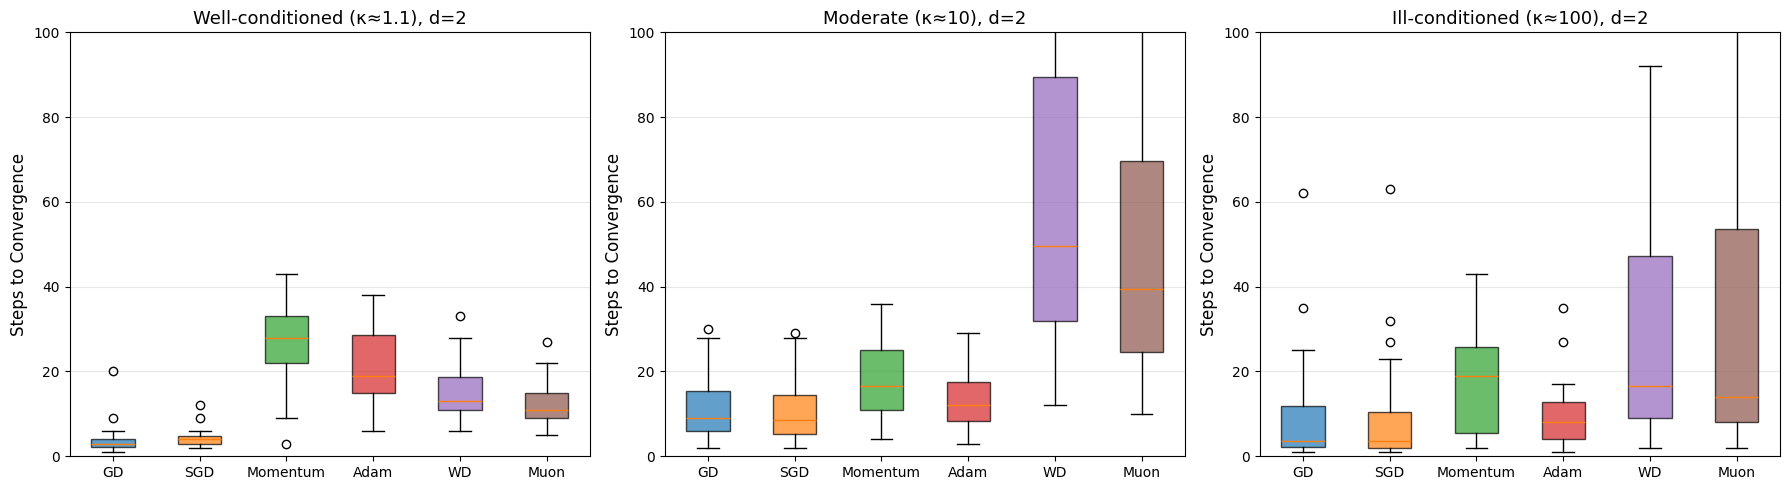

/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


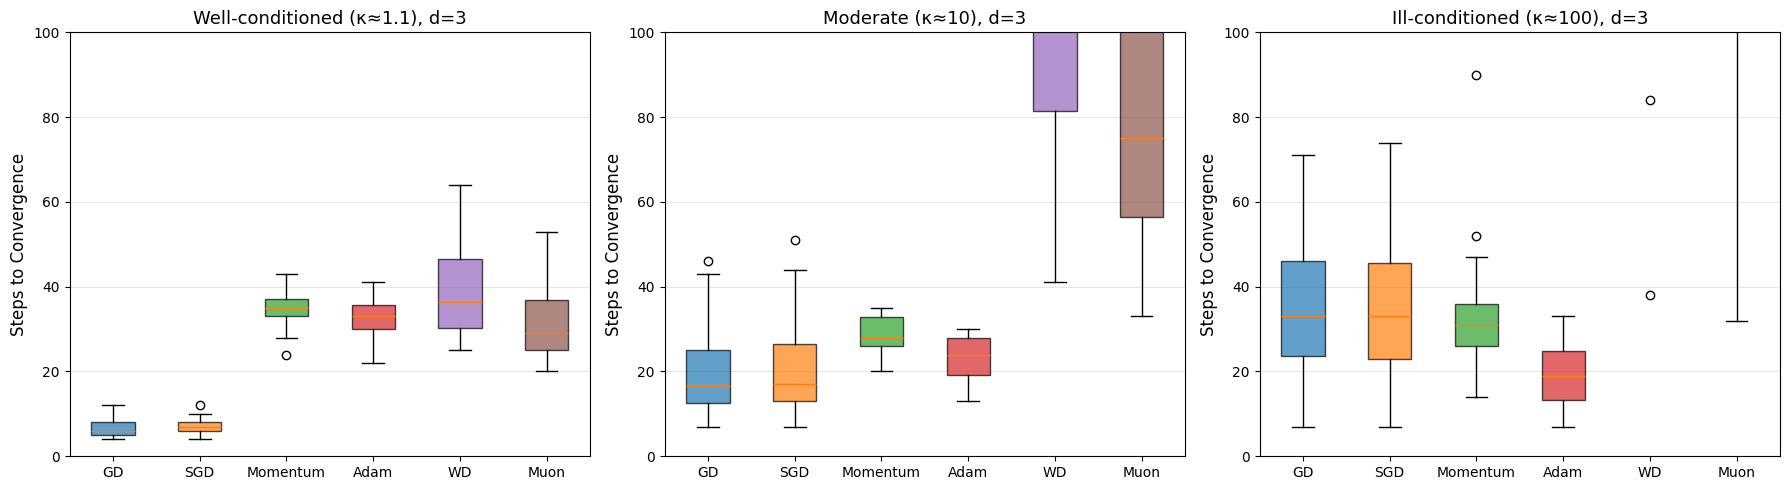

/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


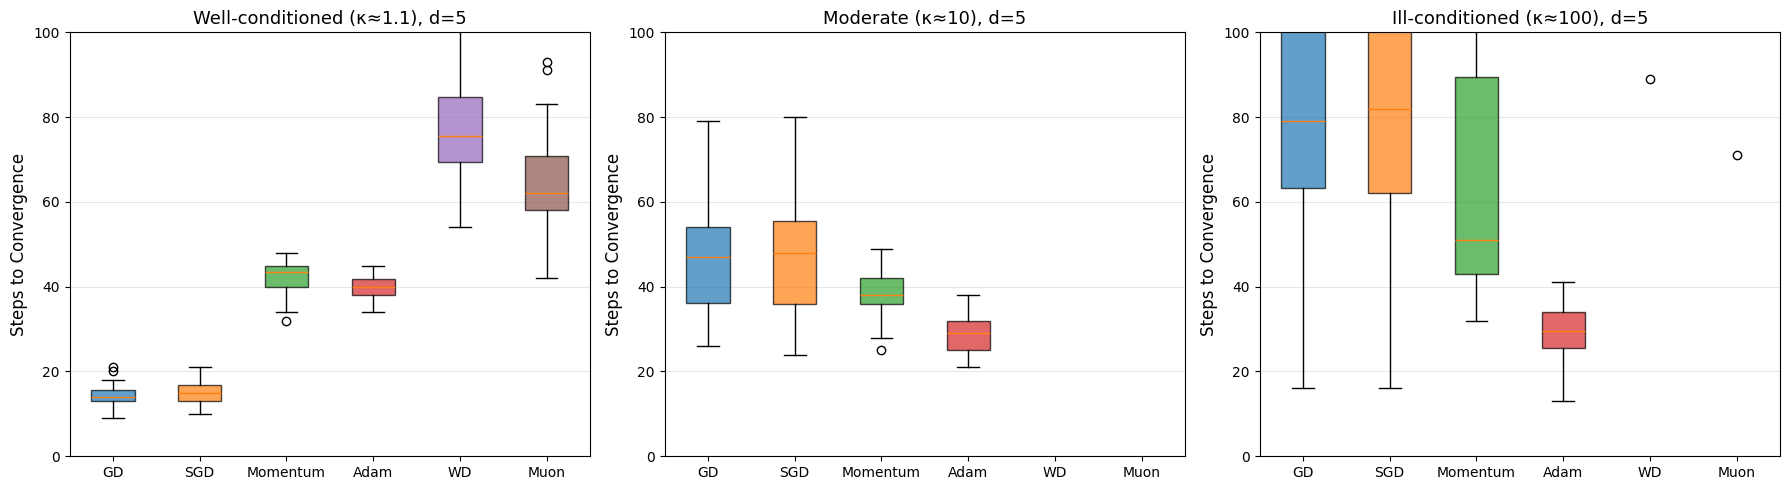

/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


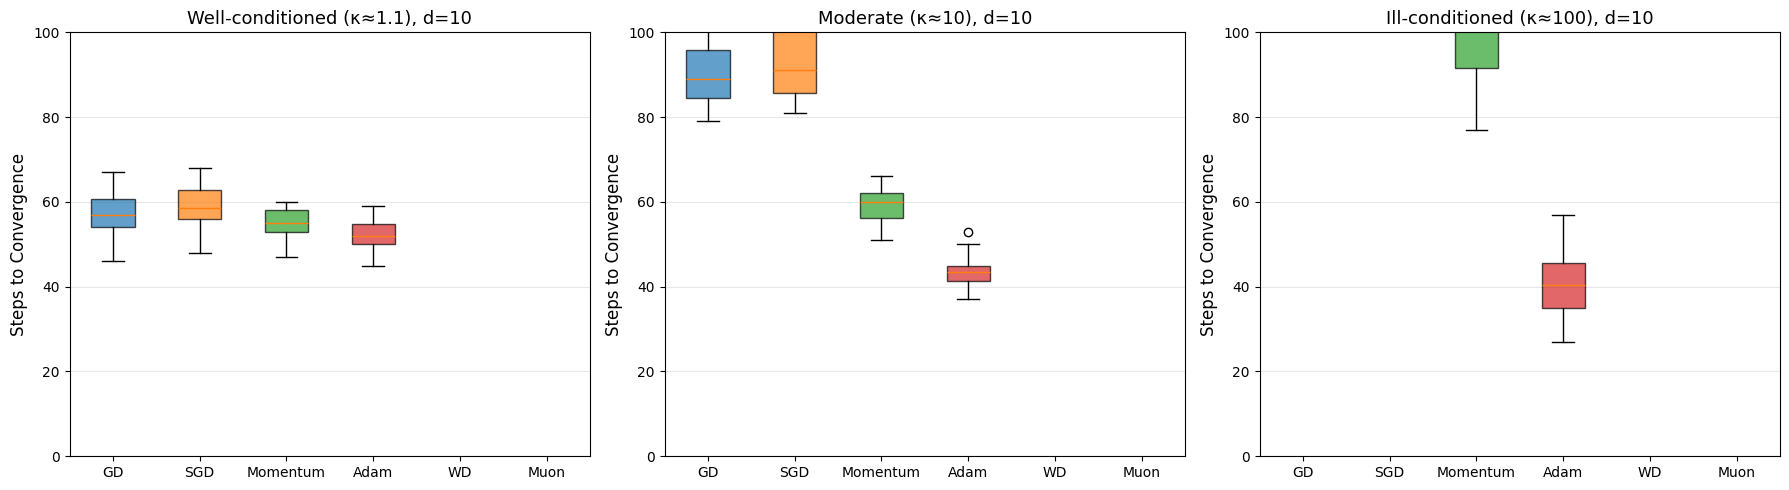

/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-2480870300.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


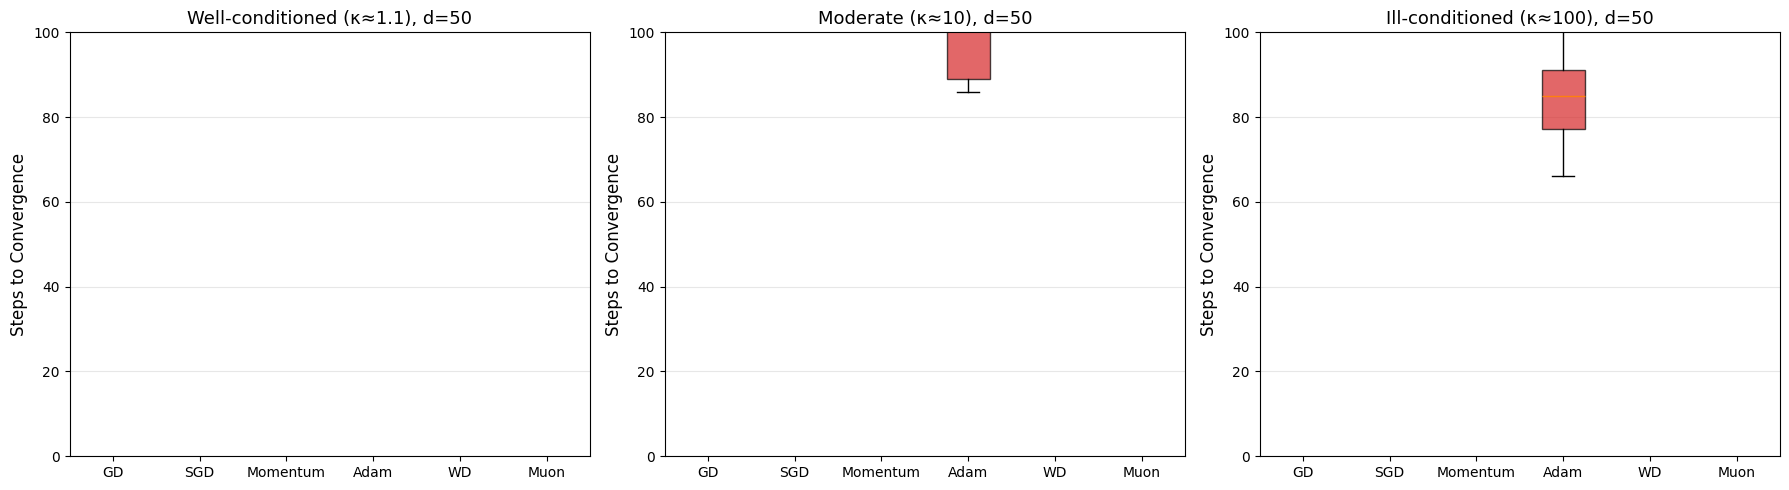

In [ ]:
# =====================
# PLOT 3: CLASSIC BOX PLOT - CONVERGENCE SPEED (ND, loss < 0.05)
# =====================
N_SAMPLES = 5000
WIDTH = 20
DEPTH = 3
N_STEPS = 200
MAX_RETRIES = 5
N_EXPERIMENTS = 30
CONV_THRESHOLD = 0.03

# Threshold-based convergence detector
def detect_convergence(losses, threshold=CONV_THRESHOLD):
    """
    Return first step where loss < threshold.
    If never below threshold → return full trajectory length.
    """
    L = np.array(losses)
    if np.isnan(L).any():
        return len(L)
    idx = np.where(L < threshold)[0]
    return int(idx[0]) if len(idx) > 0 else len(L)


optimizer_names = ["GD", "SGD", "Momentum", "Adam", "WD", "Muon"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Store convergence steps for ND
all_convergence_steps_nd = {}

print(f"\n{'#'*60}")
print(f"RUNNING {N_EXPERIMENTS} EXPERIMENTS FOR EACH ND CONDITION")
print(f"Tracking convergence: loss < {CONV_THRESHOLD}")
print(f"{'#'*60}")

# Run experiments for each ND condition
for d, conds in conditions_by_dim.items():
    for eigvals, description in conds:
        all_convergence_steps_nd[description] = {name: [] for name in optimizer_names}
        print(f"\nRunning {N_EXPERIMENTS} experiments for: {description}")

        for exp_num in range(N_EXPERIMENTS):
            result = run_optimizer_comparison(
                eigvals, description, N_SAMPLES, WIDTH, DEPTH, N_STEPS,
                seed=exp_num + 1
            )

            for name, (_, _, losses) in result['optimizer_info'].items():
                steps_to_converge = detect_convergence(losses)
                all_convergence_steps_nd[description][name].append(steps_to_converge)

            print(f"  Completed experiment {exp_num+1}/{N_EXPERIMENTS}")


# Create colored box plots
# One figure per dimension
for d, conds in conditions_by_dim.items():
    fig, axes = plt.subplots(1, len(conds), figsize=(6*len(conds), 5))
    if len(conds) == 1:
        axes = [axes]  # keep uniform

    for ax, (eigvals, description) in zip(axes, conds):
        data_to_plot = [all_convergence_steps_nd[description][name] for name in optimizer_names]

        bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax.set_ylabel('Steps to Convergence', fontsize=12)
        ax.set_title(description, fontsize=13)
        ax.set_ylim([0, 100])
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



############################################################
RUNNING 30 EXPERIMENTS TO RECORD FINAL LOSSES
############################################################

Running 30 experiments for: Well-conditioned (κ≈1.1), d=2

Testing: Well-conditioned (κ≈1.1), d=2


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.010071
  SGD: 0.010172
  Momentum: 0.010071
  Adam: 0.010071
  WD: 0.010621
  Muon: 0.010071
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010133
  SGD: 0.010496
  Momentum: 0.010133
  Adam: 0.010133
  WD: 0.011260
  Muon: 0.010133
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.009867
  SGD: 0.010116
  Momentum: 0.009867
  Adam: 0.009867
  WD: 0.010804
  Muon: 0.009867
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010130
  SGD: 0.010567
  Momentum: 0.010130
  Adam: 0.010130
  WD: 0.010892
  Muon: 0.010130
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.010057
  SGD: 0.010525
  Momentum: 0.010057
  Adam: 0.010057
  WD: 0.010748
  Muon: 0.010057
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=2

Final Losses:
  GD: 0.009913
  SGD: 0.010641
  Momentum: 0.009913
  Adam: 0.009

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009972
  SGD: 0.010426
  Momentum: 0.009972
  Adam: 0.009972
  WD: 0.012096
  Muon: 0.009972
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.010182
  SGD: 0.010366
  Momentum: 0.010183
  Adam: 0.010183
  WD: 0.012259
  Muon: 0.010183
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009893
  SGD: 0.010716
  Momentum: 0.009893
  Adam: 0.009893
  WD: 0.011974
  Muon: 0.009893
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009635
  SGD: 0.009994
  Momentum: 0.009635
  Adam: 0.009635
  WD: 0.011753
  Muon: 0.009635
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.010146
  SGD: 0.010279
  Momentum: 0.010146
  Adam: 0.010146
  WD: 0.012593
  Muon: 0.010146
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=3

Final Losses:
  GD: 0.009842
  SGD: 0.010426
  Momentum: 0.009842
  Adam: 0.009

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.009808
  SGD: 0.010049
  Momentum: 0.009808
  Adam: 0.009808
  WD: 0.014480
  Muon: 0.009987
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010151
  SGD: 0.010714
  Momentum: 0.010151
  Adam: 0.010151
  WD: 0.013826
  Muon: 0.010225
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.009661
  SGD: 0.010563
  Momentum: 0.009661
  Adam: 0.009661
  WD: 0.015580
  Muon: 0.010562
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.009655
  SGD: 0.009923
  Momentum: 0.009655
  Adam: 0.009655
  WD: 0.014793
  Muon: 0.010934
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010040
  SGD: 0.010115
  Momentum: 0.010039
  Adam: 0.010039
  WD: 0.014499
  Muon: 0.010887
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=5

Final Losses:
  GD: 0.010260
  SGD: 0.010554
  Momentum: 0.010260
  Adam: 0.010

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.012144
  SGD: 0.012562
  Momentum: 0.010623
  Adam: 0.010095
  WD: 0.035971
  Muon: 0.044263
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.012060
  SGD: 0.012819
  Momentum: 0.010487
  Adam: 0.010117
  WD: 0.032626
  Muon: 0.038443
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.011729
  SGD: 0.012507
  Momentum: 0.010398
  Adam: 0.009947
  WD: 0.035442
  Muon: 0.041763
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.011791
  SGD: 0.012112
  Momentum: 0.010265
  Adam: 0.009891
  WD: 0.029877
  Muon: 0.033316
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.012004
  SGD: 0.012806
  Momentum: 0.010743
  Adam: 0.010437
  WD: 0.033691
  Muon: 0.036354
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=10

Final Losses:
  GD: 0.011533
  SGD: 0.012372
  Momentum: 0.010427
  Adam: 

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Final Losses:
  GD: 0.054132
  SGD: 0.058806
  Momentum: 0.023979
  Adam: 0.023563
  WD: 0.124648
  Muon: 0.254278
  Completed experiment 1/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.053444
  SGD: 0.061489
  Momentum: 0.024095
  Adam: 0.023976
  WD: 0.123657
  Muon: 0.248592
  Completed experiment 2/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.053535
  SGD: 0.058013
  Momentum: 0.023821
  Adam: 0.021605
  WD: 0.123237
  Muon: 0.250751
  Completed experiment 3/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.054990
  SGD: 0.062550
  Momentum: 0.025255
  Adam: 0.023038
  WD: 0.117527
  Muon: 0.239918
  Completed experiment 4/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.051198
  SGD: 0.056020
  Momentum: 0.022017
  Adam: 0.020707
  WD: 0.123487
  Muon: 0.247656
  Completed experiment 5/30

Testing: Well-conditioned (κ≈1.1), d=50

Final Losses:
  GD: 0.049113
  SGD: 0.054345
  Momentum: 0.022378
  Adam: 

/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


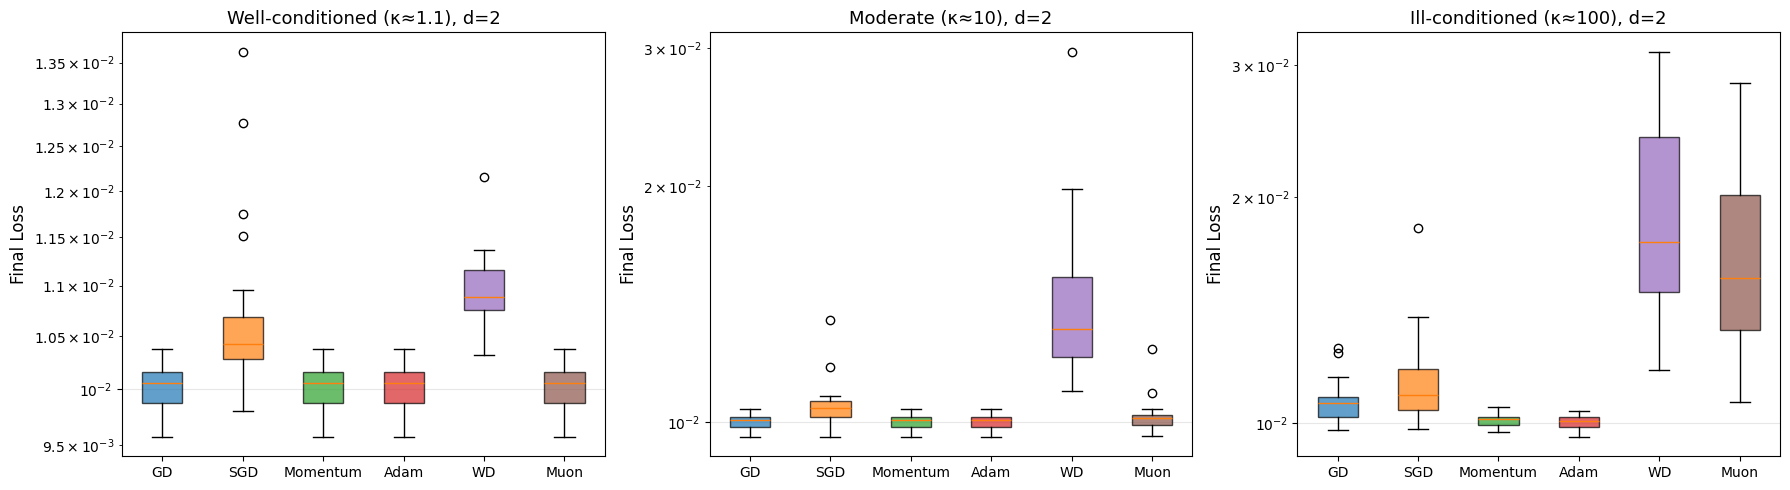

/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


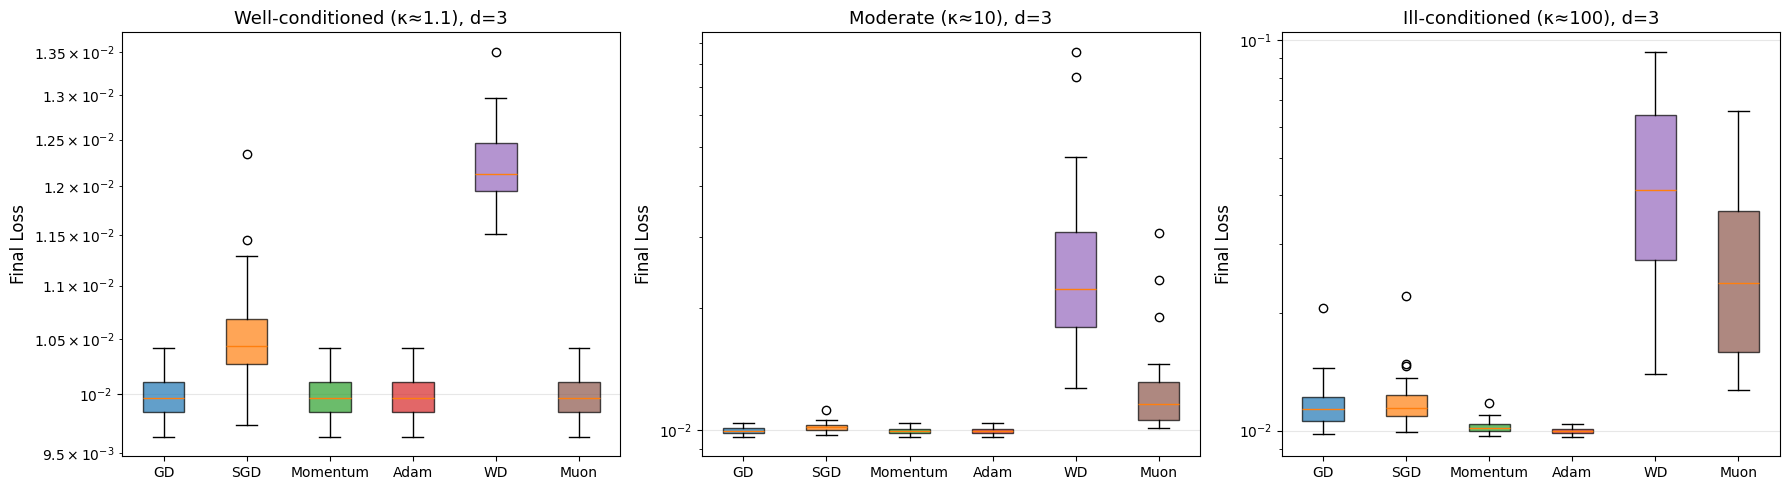

/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


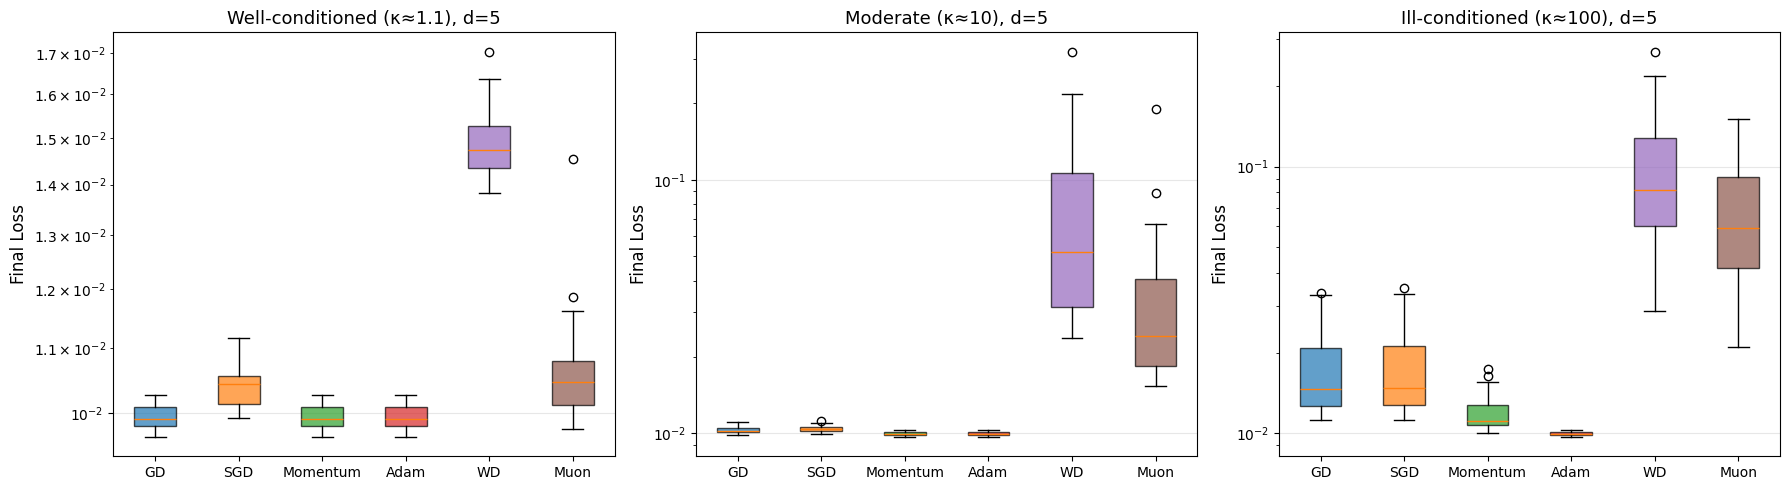

/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


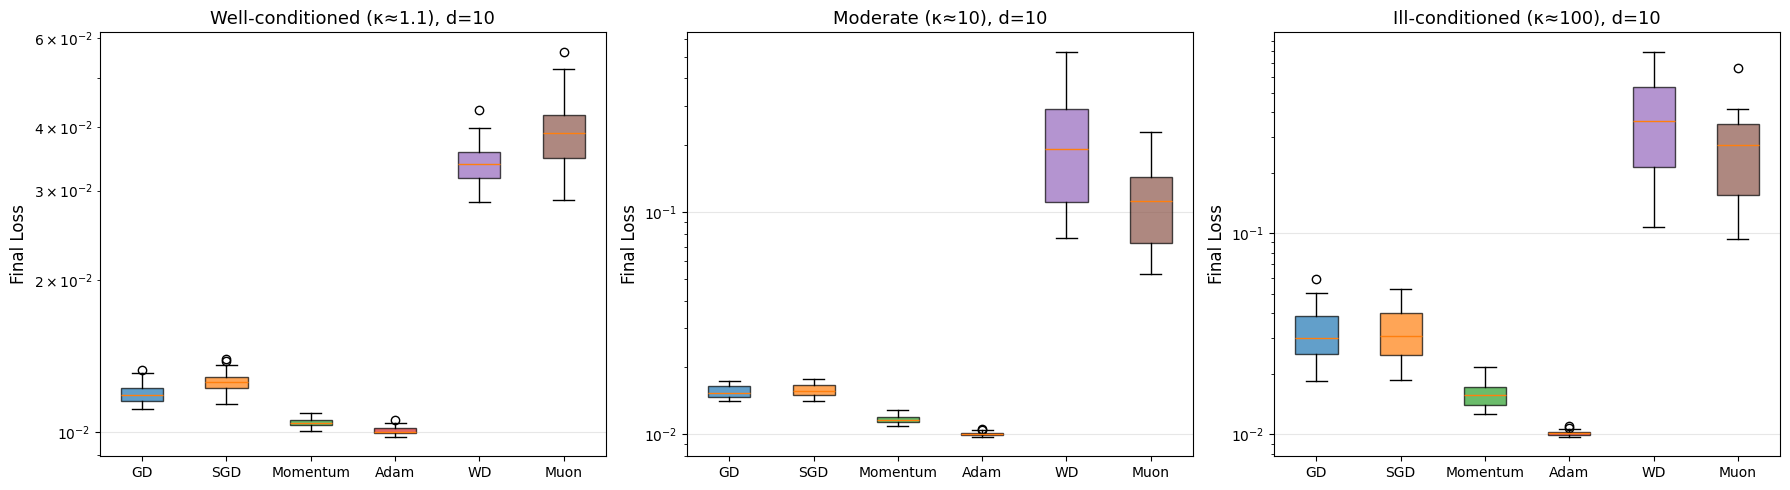

/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-818310741.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


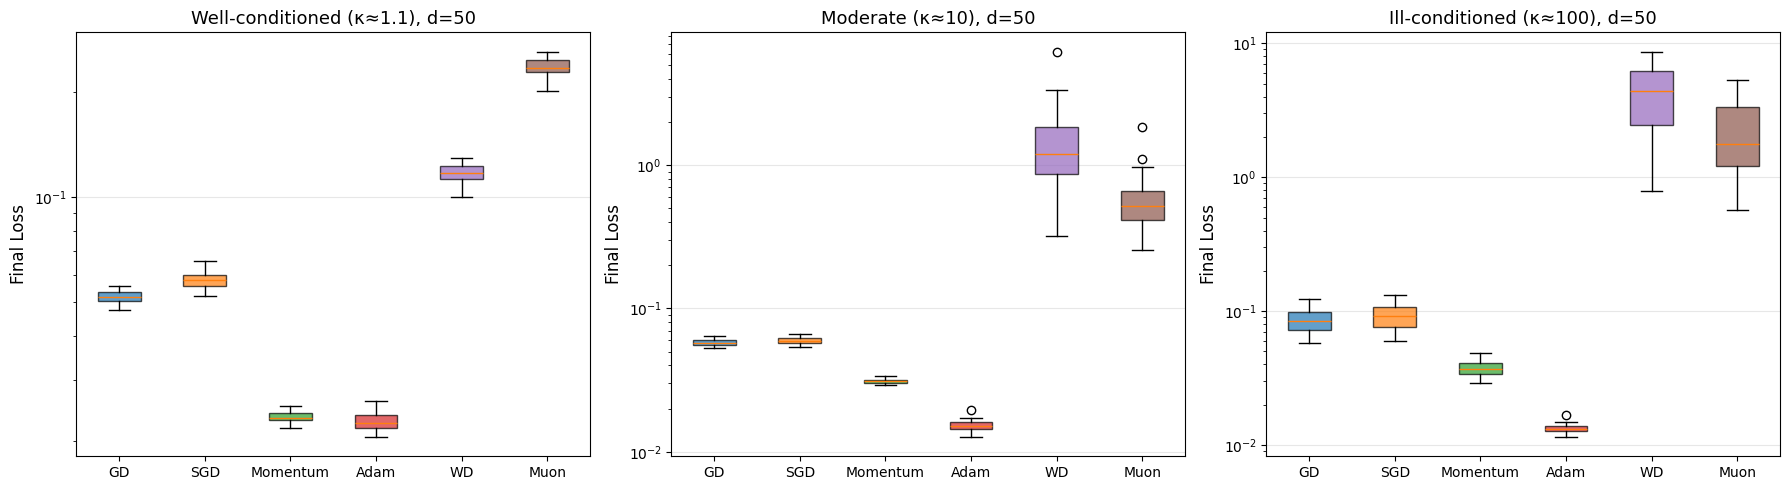

In [ ]:
# =====================
# PLOT: FINAL LOSSES BOX PLOT (ND)
# =====================

N_EXPERIMENTS = 30

optimizer_names = ["GD", "SGD", "Momentum", "Adam", "WD", "Muon"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Store final losses
all_final_losses_nd = {}

print(f"\n{'#'*60}")
print(f"RUNNING {N_EXPERIMENTS} EXPERIMENTS TO RECORD FINAL LOSSES")
print(f"{'#'*60}")

# Run experiments
for d, conds in conditions_by_dim.items():
    for eigvals, description in conds:
        all_final_losses_nd[description] = {name: [] for name in optimizer_names}
        print(f"\nRunning {N_EXPERIMENTS} experiments for: {description}")

        for exp_num in range(N_EXPERIMENTS):
            result = run_optimizer_comparison(
                eigvals, description, N_SAMPLES, WIDTH, DEPTH, N_STEPS,
                seed=exp_num + 1
            )

            for name, (_, _, losses) in result['optimizer_info'].items():
                final_loss = losses[-1]
                all_final_losses_nd[description][name].append(final_loss)

            print(f"  Completed experiment {exp_num+1}/{N_EXPERIMENTS}")


# Create colored box plots of final losses
# One figure per dimension
for d, conds in conditions_by_dim.items():
    fig, axes = plt.subplots(1, len(conds), figsize=(6*len(conds), 5))
    if len(conds) == 1:
        axes = [axes]  # keep uniform

    for ax, (eigvals, description) in zip(axes, conds):
        data_to_plot = [all_final_losses_nd[description][name] for name in optimizer_names]

        bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax.set_ylabel('Final Loss', fontsize=12)
        ax.set_title(description, fontsize=13)
        ax.set_yscale('log')  # optional: log scale to handle large differences
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



Streaming output truncated to the last 5000 lines.

Final Losses:
  GD: 0.016549
  SGD: 0.018523
  Momentum: 0.010290
  Adam: 0.010290
  WD: 0.024123
  Muon: 0.017895
  Completed experiment 8/30

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: 0.010079
  SGD: 0.010120
  Momentum: 0.010077
  Adam: 0.010077
  WD: 0.013403
  Muon: 0.011406
  Completed experiment 9/30

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: 0.010167
  SGD: 0.010426
  Momentum: 0.010166
  Adam: 0.010195
  WD: 0.026159
  Muon: 0.011468
  Completed experiment 10/30

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: 0.010523
  SGD: nan
  Momentum: 0.009814
  Adam: 0.009814
  WD: 0.017788
  Muon: 0.010978
  Completed experiment 11/30

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: 0.010819
  SGD: 0.041374
  Momentum: 0.009717
  Adam: 0.009715
  WD: 0.010778
  Muon: 0.009890
  Completed experiment 12/30

Testing: Ill-conditioned (κ≈100), d=2

Final Losses:
  GD: nan
  SGD: 0.02

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


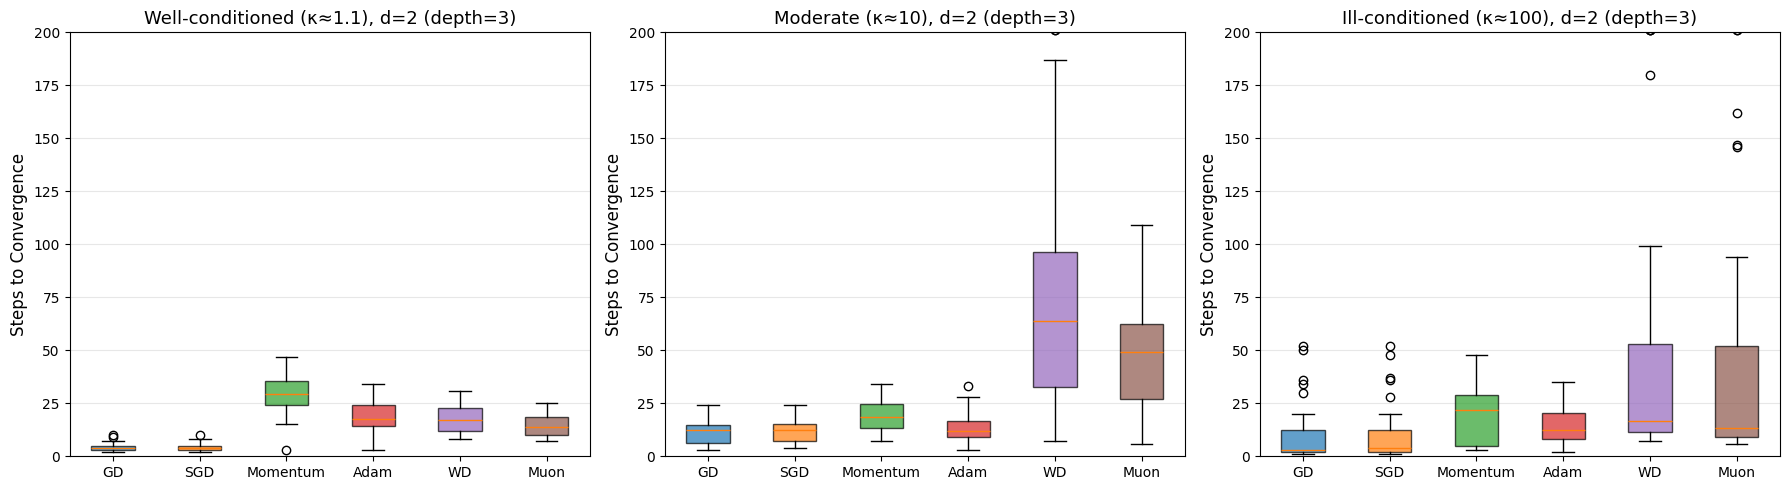

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


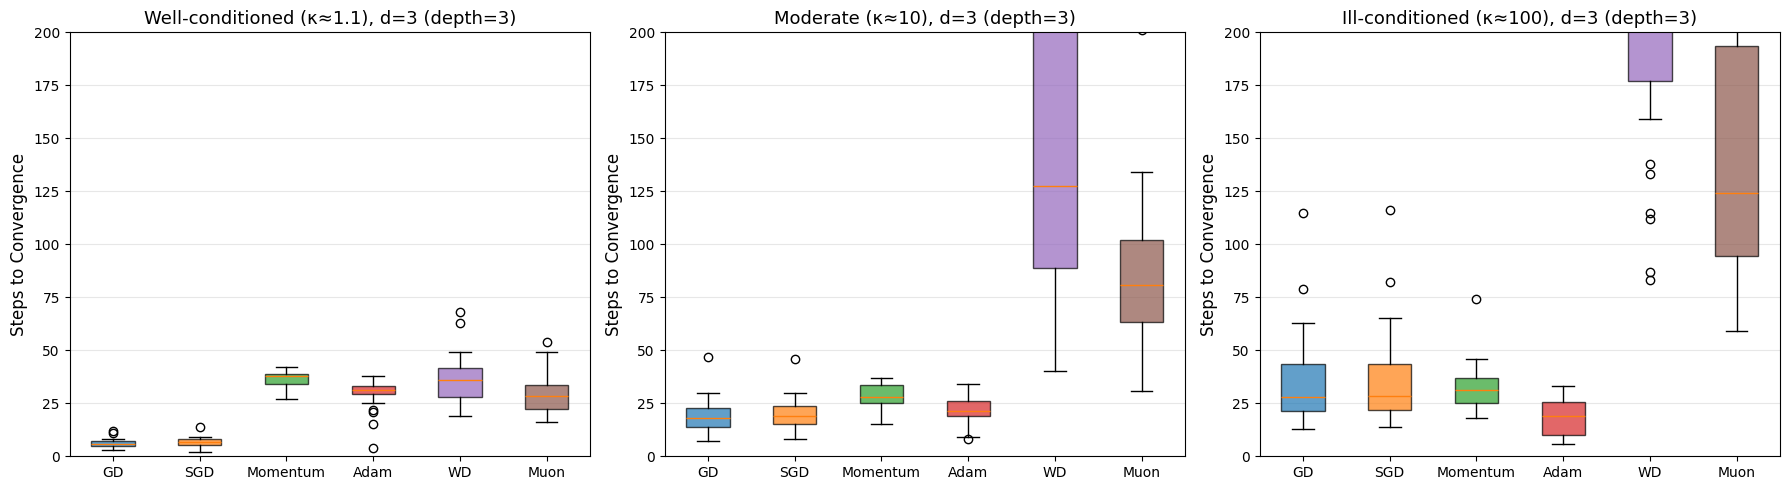

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


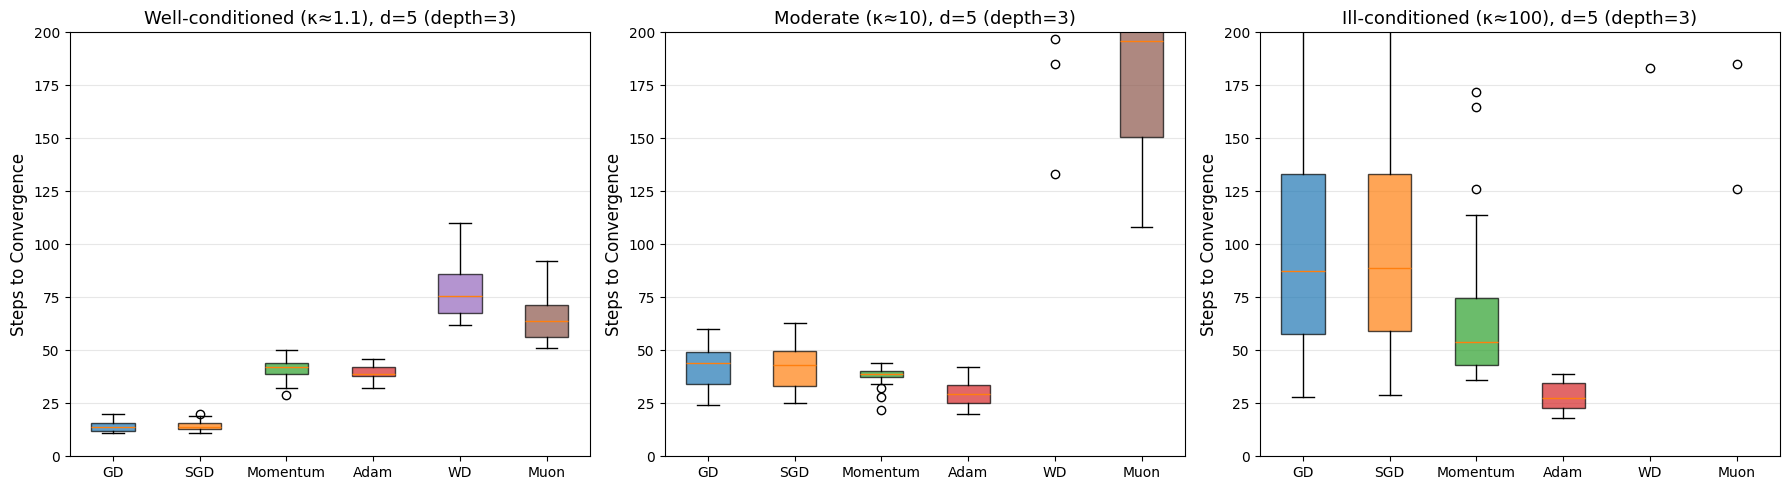

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


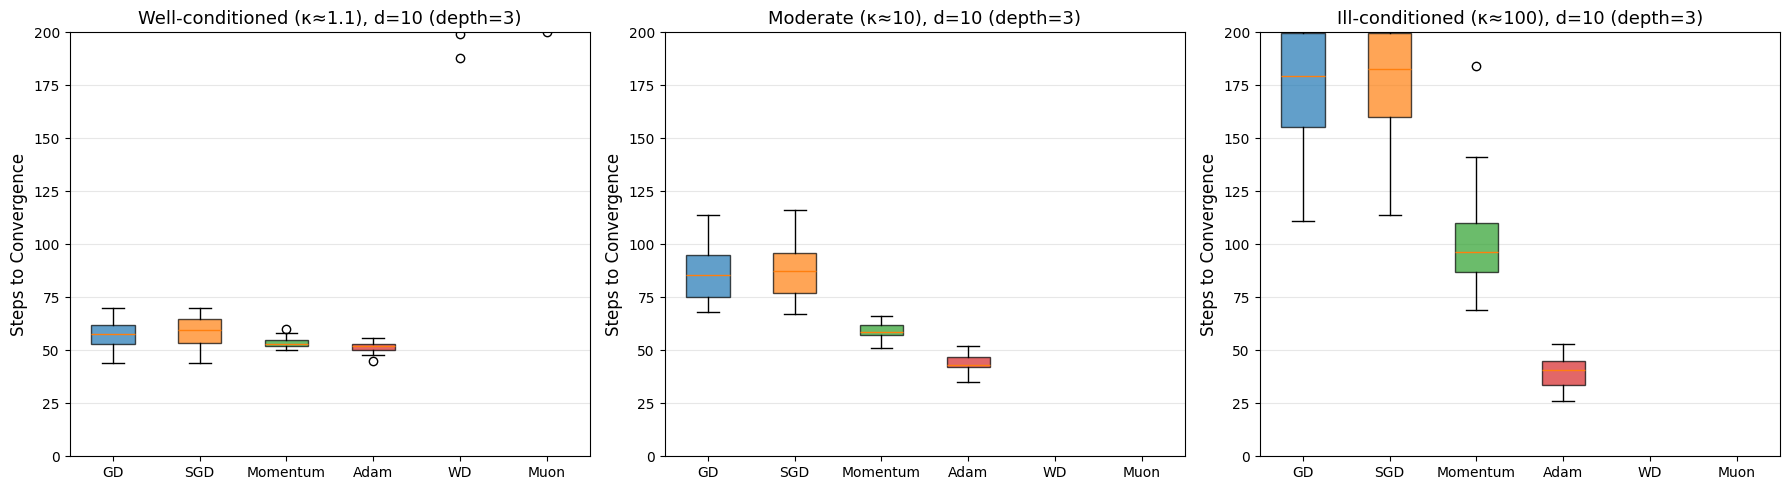

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


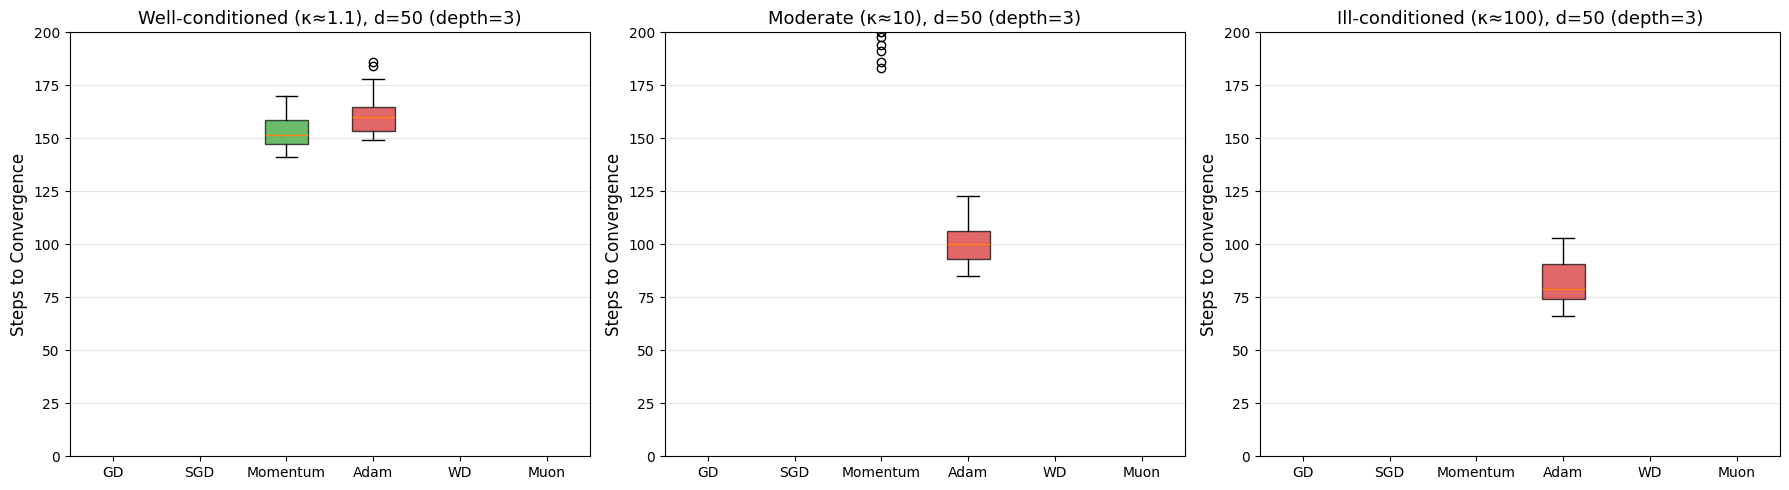

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


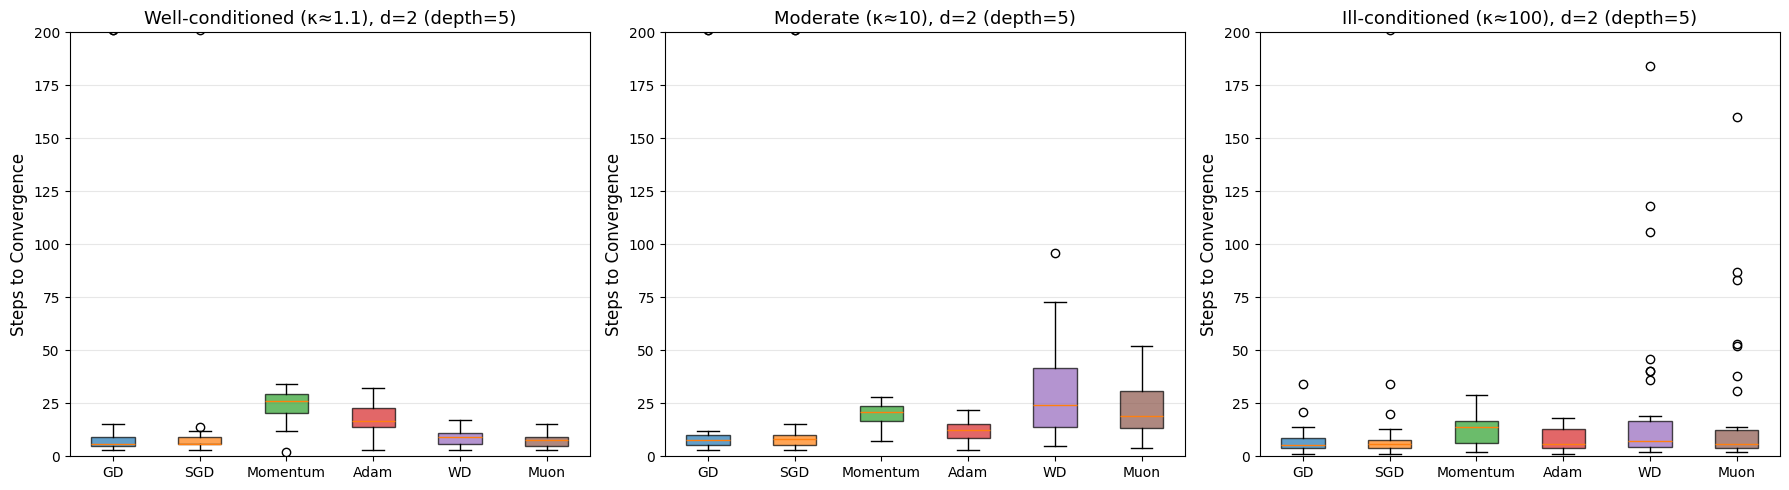

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


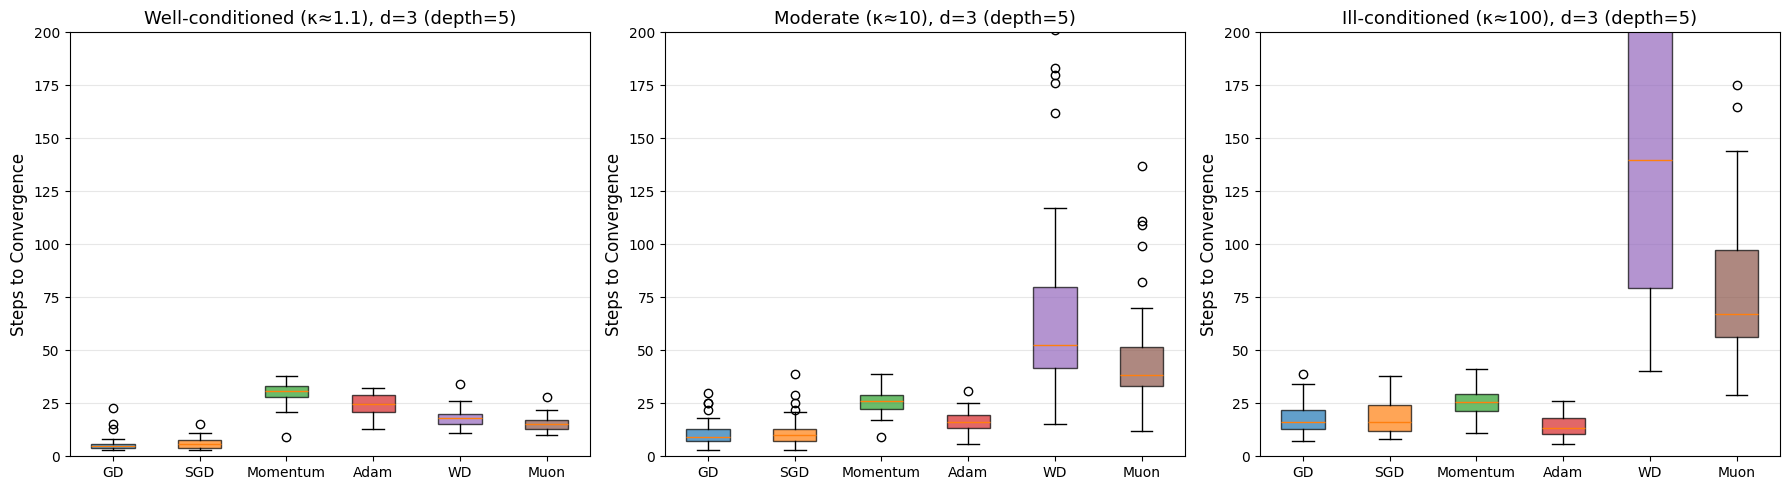

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


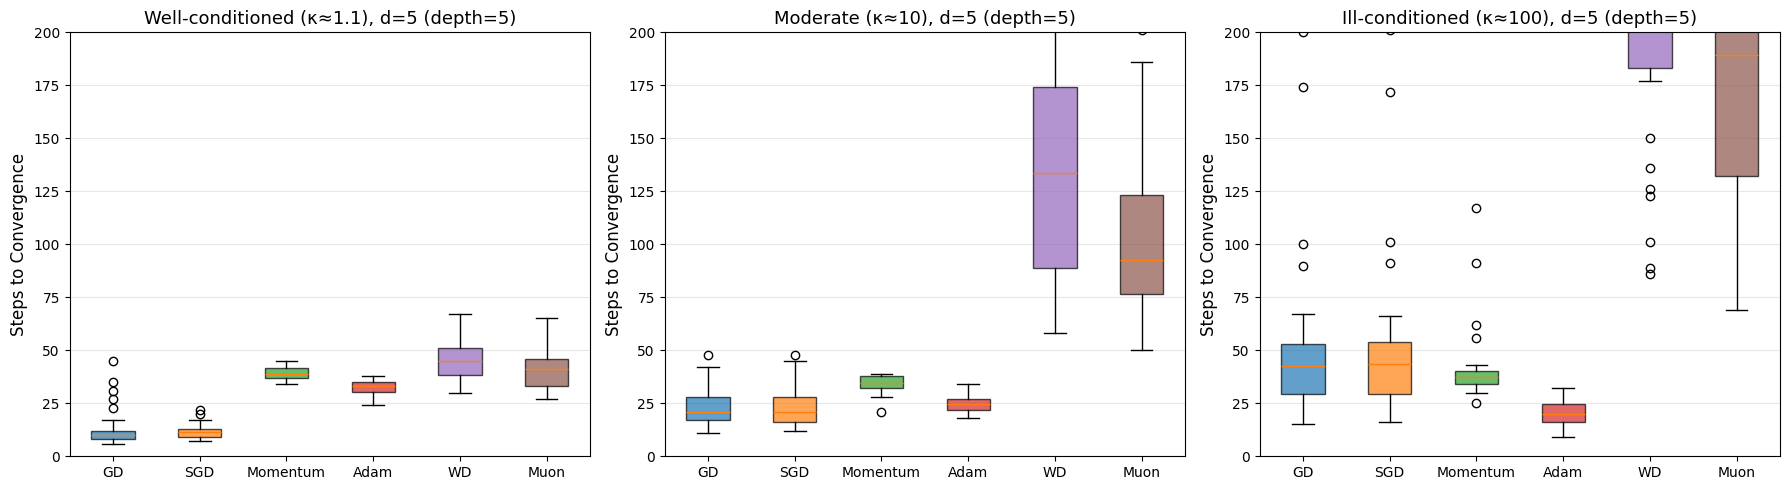

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


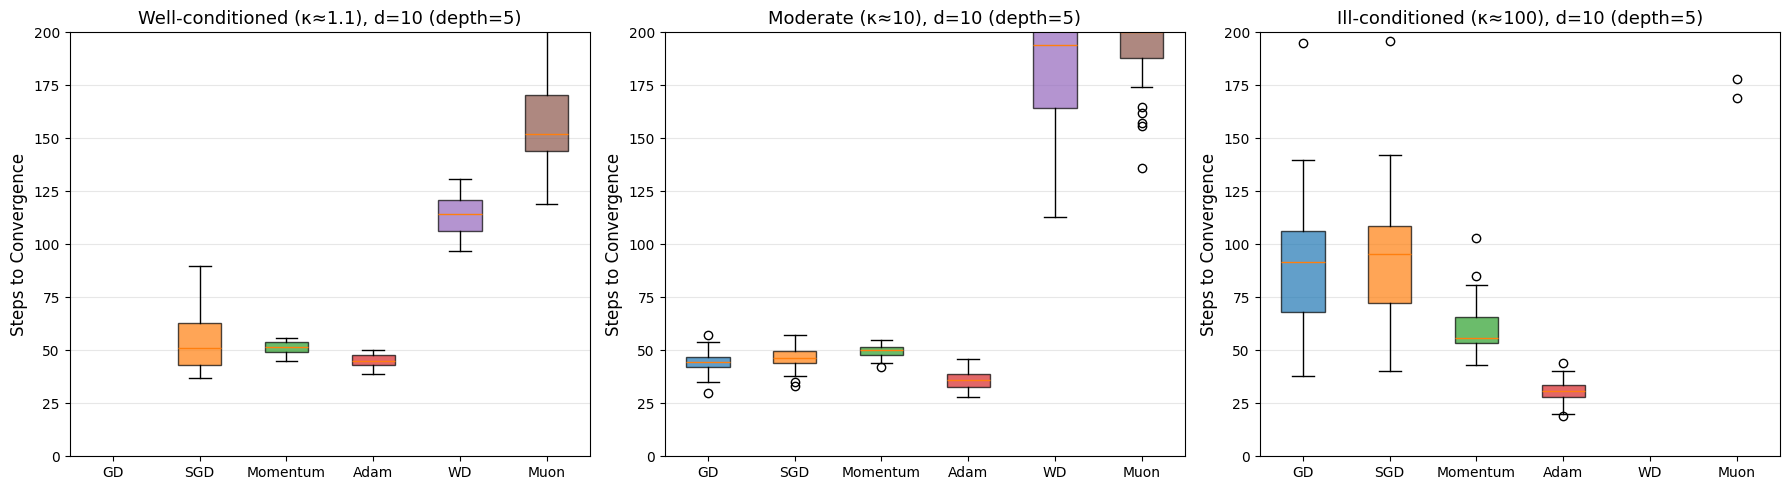

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


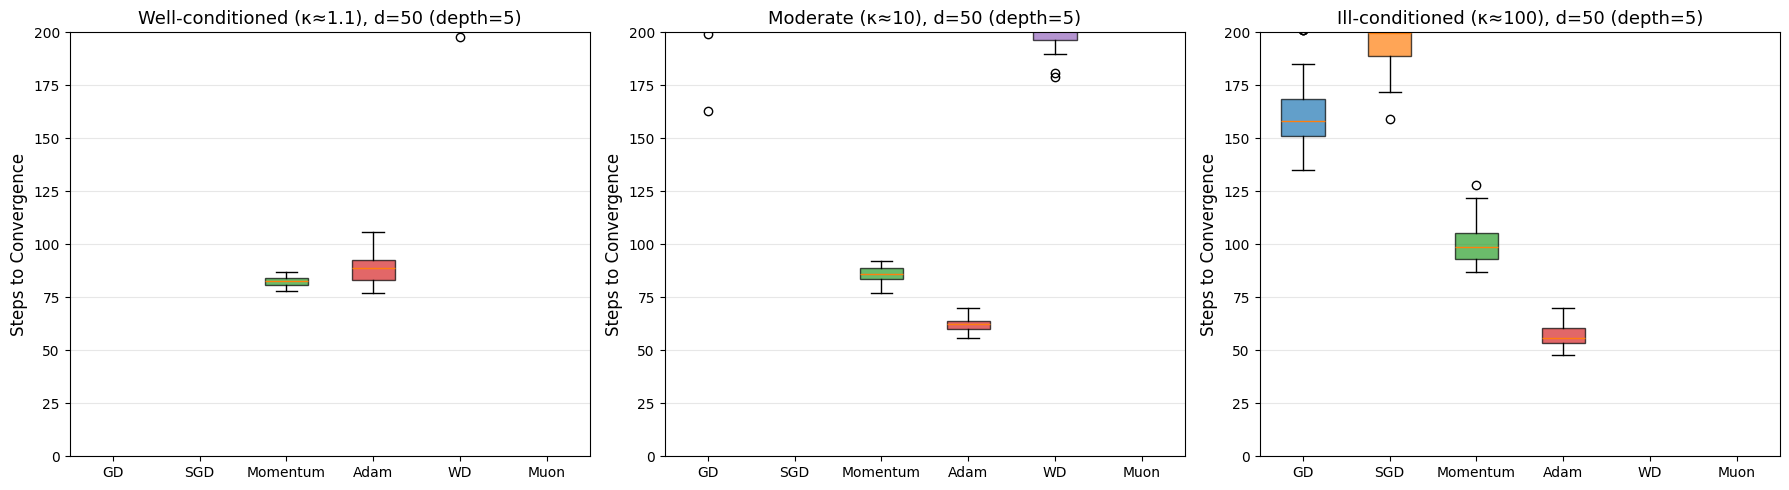

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


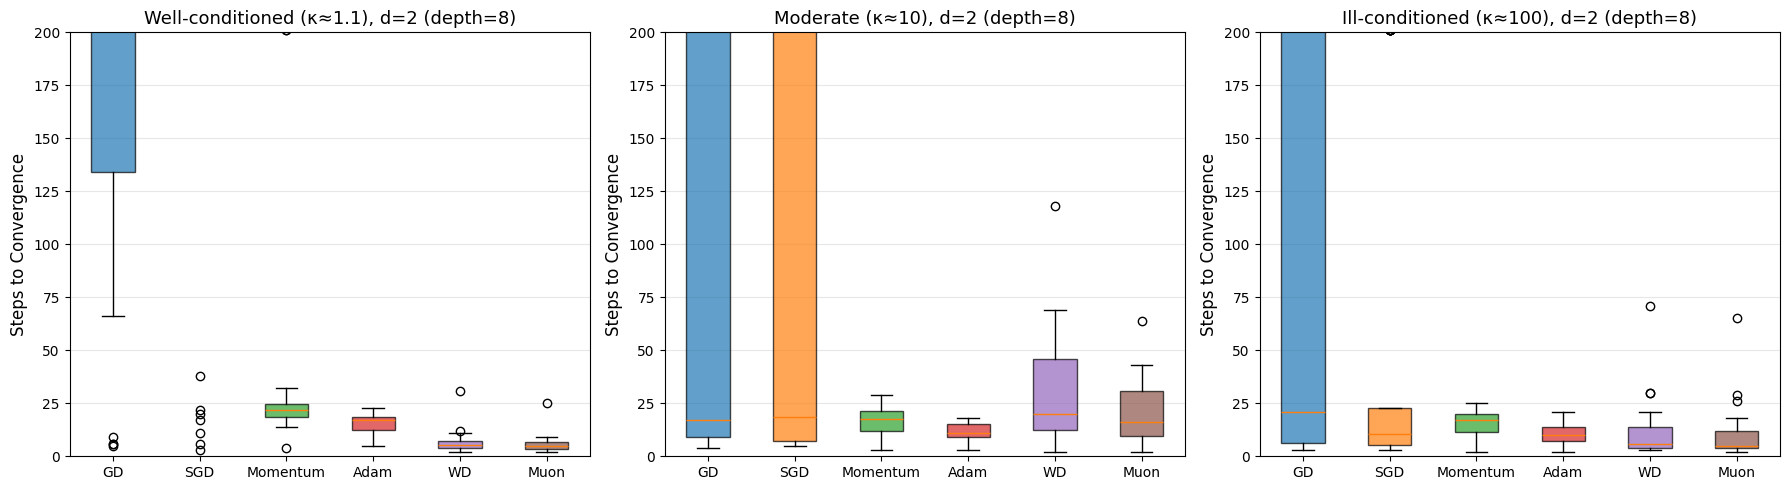

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


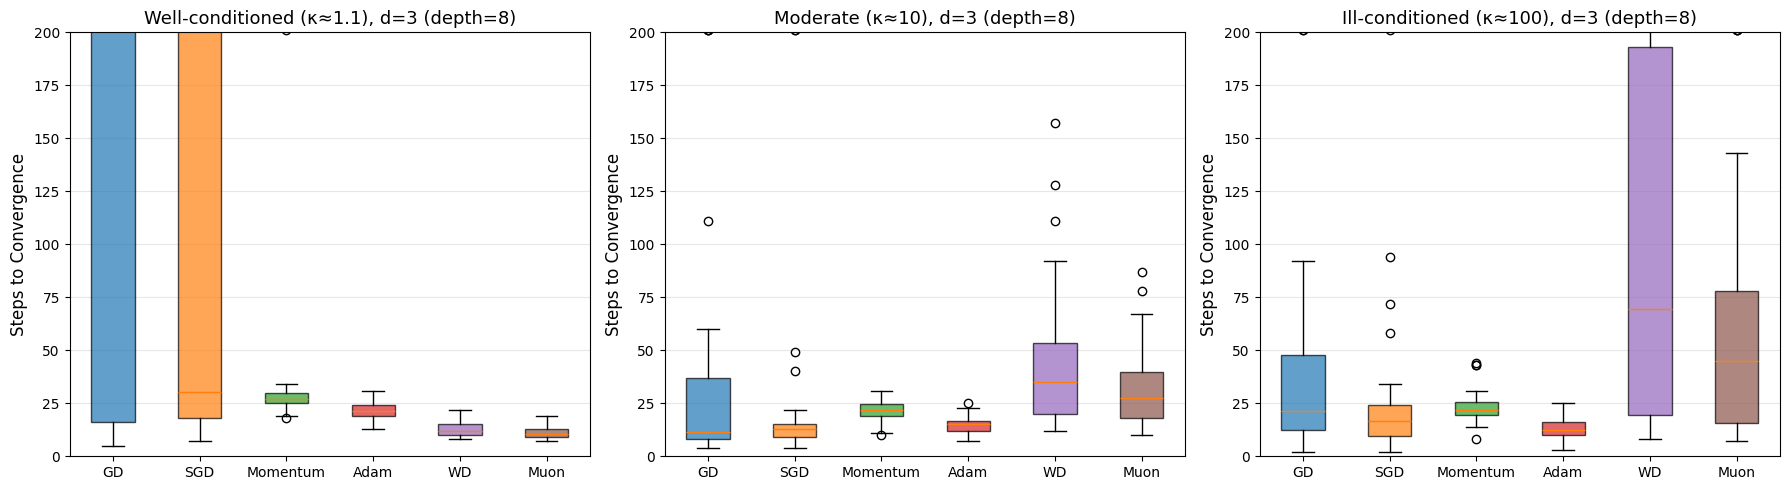

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


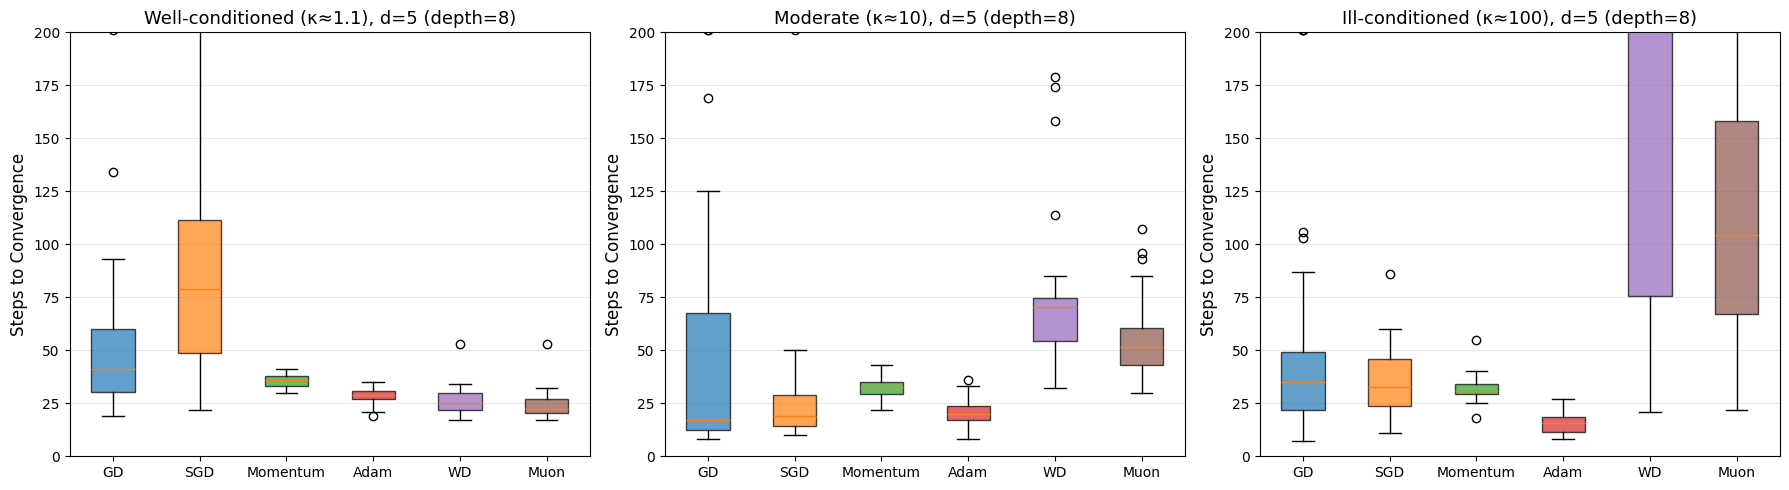

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


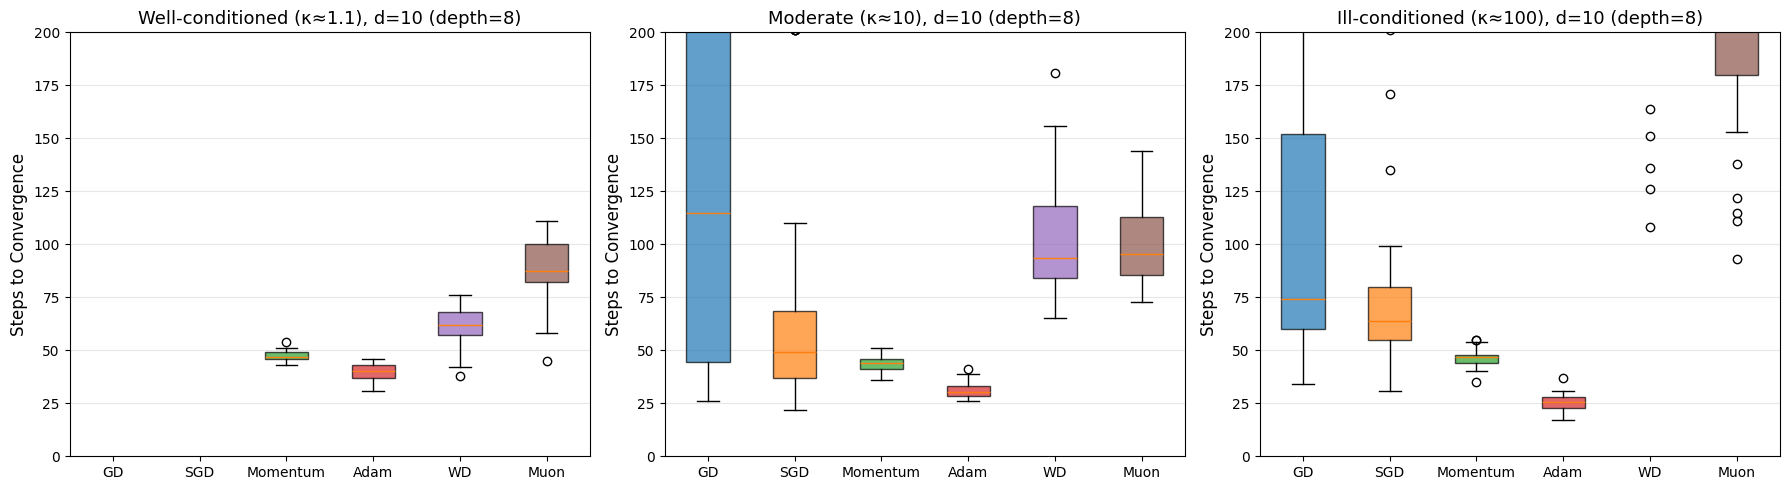

/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
/tmp/ipython-input-501022203.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)


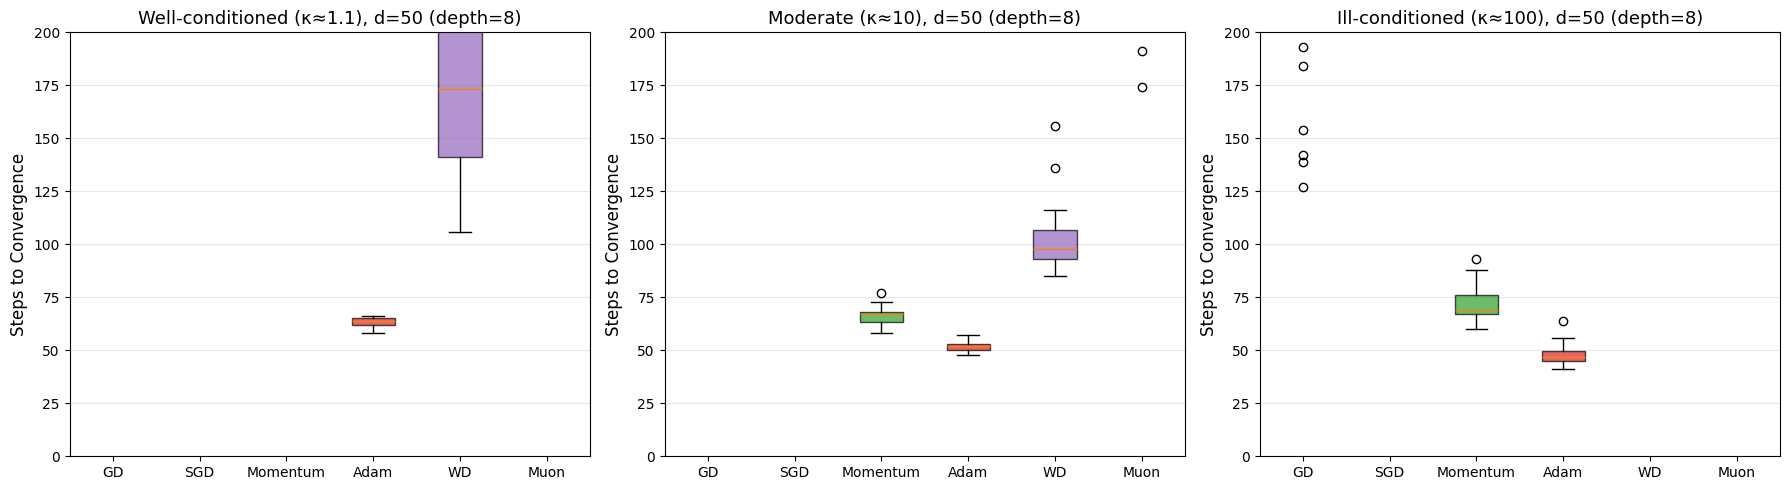


=== Summary Table ===

     Depth                      Condition Optimizer  Steps Mean  Steps Std  \
0        3  Well-conditioned (κ≈1.1), d=2        GD        4.30       1.92   
1        3  Well-conditioned (κ≈1.1), d=2       SGD        4.17       1.81   
2        3  Well-conditioned (κ≈1.1), d=2  Momentum       29.63       9.04   
3        3  Well-conditioned (κ≈1.1), d=2      Adam       18.53       7.80   
4        3  Well-conditioned (κ≈1.1), d=2        WD       17.13       6.35   
..     ...                            ...       ...         ...        ...   
265      8  Ill-conditioned (κ≈100), d=50       SGD      201.00       0.00   
266      8  Ill-conditioned (κ≈100), d=50  Momentum       71.77       7.83   
267      8  Ill-conditioned (κ≈100), d=50      Adam       47.97       4.78   
268      8  Ill-conditioned (κ≈100), d=50        WD      201.00       0.00   
269      8  Ill-conditioned (κ≈100), d=50      Muon      201.00       0.00   

     Final Loss Mean  Final Loss Std  


In [ ]:

# =====================
# EXPERIMENT SETTINGS
# =====================
N_SAMPLES = 5000
WIDTH = 20
DEPTHS = [3, 5, 8]  # multiple depths
N_STEPS = 200
N_EXPERIMENTS = 20
CONV_THRESHOLD = 0.02

optimizer_names = ["GD", "SGD", "Momentum", "Adam", "WD", "Muon"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# =====================
# THRESHOLD-BASED CONVERGENCE DETECTOR
# =====================
def detect_convergence(losses, threshold=CONV_THRESHOLD):
    L = np.array(losses)
    if np.isnan(L).any():
        return len(L)
    idx = np.where(L < threshold)[0]
    return int(idx[0]) if len(idx) > 0 else len(L)

# =====================
# STORAGE
# =====================
# Structure: results[depth][description][optimizer] = list of values
results_steps = {d: {} for d in DEPTHS}
results_final_loss = {d: {} for d in DEPTHS}

# =====================
# RUN EXPERIMENTS
# =====================
for d in DEPTHS:
    print(f"\n{'='*60}\nRUNNING EXPERIMENTS FOR DEPTH = {d}\n{'='*60}")

    for dim, conds in conditions_by_dim.items():
        for eigvals, description in conds:
            key = f"{description}"
            if key not in results_steps[d]:
                results_steps[d][key] = {opt: [] for opt in optimizer_names}
                results_final_loss[d][key] = {opt: [] for opt in optimizer_names}

            print(f"\nRunning {N_EXPERIMENTS} experiments for: {key}")

            for exp_num in range(N_EXPERIMENTS):
                result = run_optimizer_comparison(
                    eigvals, description, N_SAMPLES, WIDTH, d, N_STEPS,
                    seed=exp_num + 1
                )

                for name, (_, _, losses) in result['optimizer_info'].items():
                    # Steps to converge
                    steps = detect_convergence(losses)
                    results_steps[d][key][name].append(steps)
                    # Final loss
                    results_final_loss[d][key][name].append(losses[-1])

                print(f"  Completed experiment {exp_num+1}/{N_EXPERIMENTS}")

# =====================
# PLOT BOX PLOTS
# =====================
for d in DEPTHS:
    for cond_dim, conds in conditions_by_dim.items():
        fig, axes = plt.subplots(1, len(conds), figsize=(6*len(conds), 5))
        if len(conds) == 1:
            axes = [axes]

        for ax, (eigvals, description) in zip(axes, conds):
            data_to_plot = [results_steps[d][description][name] for name in optimizer_names]
            bp = ax.boxplot(data_to_plot, labels=optimizer_names, patch_artist=True)
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)

            ax.set_ylabel('Steps to Convergence', fontsize=12)
            ax.set_title(description + f" (depth={d})", fontsize=13)
            ax.set_ylim([0, N_STEPS])
            ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

# =====================
# COMPUTE MEAN & STD TABLE
# =====================
table_rows = []

for d in DEPTHS:
    for description in results_steps[d].keys():
        for opt in optimizer_names:
            steps_mean = np.mean(results_steps[d][description][opt])
            steps_std = np.std(results_steps[d][description][opt])
            loss_mean = np.mean(results_final_loss[d][description][opt])
            loss_std = np.std(results_final_loss[d][description][opt])
            table_rows.append({
                "Depth": d,
                "Condition": description,
                "Optimizer": opt,
                "Steps Mean": steps_mean,
                "Steps Std": steps_std,
                "Final Loss Mean": loss_mean,
                "Final Loss Std": loss_std
            })

df_summary = pd.DataFrame(table_rows)
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Summary Table ===\n")
print(df_summary)


In [ ]:
df_summary.to_csv('results_summary.csv', index=False)

NameError: name 'df_summary' is not defined

# Convergence Tracking

In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


def track_convergence(model_class, X, Y, optim_name='SGD', lr=0.01, batch_size=100,
                      weight_decay=0.0, momentum=0.0, epochs=10, width=20, depth=2, d=2,
                      device='cpu', seed=None, clip_grad=True):
    if seed is not None:
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    dataset = TensorDataset(X, Y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = model_class(width=width, depth=depth, d=d).to(device)

    if optim_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay, momentum=momentum)
    elif optim_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optim_name == 'SGDwd':
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unknown optimizer {optim_name}")

    criterion = F.mse_loss
    norm_progression, loss_progression = [], []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            if clip_grad:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
            optimizer.step()
            epoch_loss += loss.item() * x_batch.size(0)

        avg_loss = epoch_loss / len(dataset)
        layer_norms = [p.data.norm().item() for p in model.parameters()]
        norm_progression.append(layer_norms)
        loss_progression.append(avg_loss)

        if epoch in [0, epochs//2, epochs-1]:
            norm_str = ", ".join([f"{n:.3f}" for n in layer_norms])
            print(f"Epoch {epoch+1}/{epochs}: loss={avg_loss:.6f}, norms=[{norm_str}]")

    return norm_progression, loss_progression, model